# Part I - Ford GoBike Trip Data Visualization

## by Mofeoluwa Jide-Jegede

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of February 2019. 

>The dataset features information about **183412** rides with **16** variables. The columns which represent the variables include Duration of trip(in seconds), Start time, End time, Start_station_id, Start_station_name, Start_station_latitude, Start_station_longitude,End_station_id, End_station_name, End_station_latitude, End_station_longitude, Bike_id, User_type, Member_birth_year, Member_gender, and Bike_share_for_all_trip.







In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [3]:
#Load the 201902-fordgobike-tripdata.csv dataset into the dataframe df

df=pd.read_csv("201902-fordgobike-tripdata.csv")

In [4]:
#display shape of the dataframe

df.shape

(183412, 16)

In [5]:
#display the first 5 rows of the data to see the variables in the dataset

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#display information about the dataset including the datatype of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<a id='wrangling'></a>
# Data Wrangling

### Structure of dataset

The dataset for this analysis has 183412 rows and 16 columns.

### The main feature(s) of interest in dataset

The features of focus for this project include:
1. The trip duration(in seconds)
2. The start and end time of trip
3. Station names
4. Bike's id
5. User type
6. Member birth year and 
7. Member gender

In [7]:
sum(df.duplicated())

0

## Data Cleaning

In [8]:
#made a copy of the data for cleaning
ford_data= df.copy()

In [9]:
#delete columns that are not needed for analysis 
del_col = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip']

In [10]:
#deleting the columns from the database
ford_data = ford_data.drop(del_col, axis = 1)

In [11]:
#check for null values in the dataset
ford_data.isnull().sum()

duration_sec             0
start_time               0
end_time                 0
start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
bike_id                  0
user_type                0
member_birth_year     8265
member_gender         8265
dtype: int64

In [12]:
#store columns with NaN values into an array
stations=['start_station_id','start_station_name', 'end_station_id', 'end_station_name','member_birth_year','member_gender']

In [13]:
#drop rows with NaN values 
ford_data.dropna(subset = stations, inplace = True)

In [14]:
#confirm if there are no null values in any of the colums
ford_data.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
bike_id               0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

In [15]:
#convert start and end time data type to datetime
ford_data.start_time = pd.to_datetime(ford_data.start_time)
ford_data.end_time = pd.to_datetime(ford_data.end_time)

In [16]:
# create new columns from start_time and end time
ford_data['start_weekday'] = ford_data.start_time.dt.weekday 
ford_data['start_hour'] = ford_data.start_time.dt.hour
ford_data['start_month'] = ford_data.start_time.dt.month_name()



ford_data['end_weekday'] = ford_data.end_time.dt.weekday 
ford_data['end_hour'] = ford_data.end_time.dt.hour
ford_data['end_month'] = ford_data.end_time.dt.month_name()



In [17]:
# convert seconds to minutes
ford_data['duration_minutes'] = ford_data['duration_sec']/60

In [18]:
# convert birth year to Age as at 2019
ford_data['Age'] = 2019 - ford_data['member_birth_year']

In [19]:
#Converting the datatype of the following columns

datatype= { 'start_station_id': 'object',
             'end_station_id': 'object',
            'bike_id': 'object',
            'user_type': 'category',
              'start_weekday': 'object',
           'end_weekday':'object',
           'Age': 'int',
           'duration_minutes':'int'
          }


ford_data = ford_data.astype(datatype)

In [20]:
#confirm the datatype and location of each column
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_id    174952 non-null  object        
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  object        
 6   end_station_name    174952 non-null  object        
 7   bike_id             174952 non-null  object        
 8   user_type           174952 non-null  category      
 9   member_birth_year   174952 non-null  float64       
 10  member_gender       174952 non-null  object        
 11  start_weekday       174952 non-null  object        
 12  start_hour          174952 non-null  int64         
 13  start_month         174952 no

In [21]:
#In Pandas, it is assumed the day of the week starts with Monday=0 to Sunday=6.
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [22]:
ford_data['start_weekday'] = ford_data['start_weekday'].map(dmap)

In [23]:
ford_data['end_weekday'] = ford_data['end_weekday'].map(dmap)

In [24]:
#For this analytics, hours before noon would be considered morning, from noon to 18:00 is afternoon 
#from then to 12:00am is evening
ford_data['start_hour'] = (ford_data['start_hour'] % 24 + 4) // 4
ford_data['start_hour'].replace({1: 'Late Night',
               2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)


In [25]:
ford_data['end_hour'] = (ford_data['end_hour'] % 24 + 4) // 4
ford_data['end_hour'].replace({1: 'Late Night',
                    2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)



In [26]:
#check the distribution in the Age column for discrepancies
ford_data['Age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: Age, dtype: float64

In [27]:
#delete columns that are not needed for analysis 
del_col2 = ['start_time', 'end_time', 'member_birth_year']

In [28]:
#deleting the columns from the database
ford_data = ford_data.drop(del_col2, axis = 1)

In [29]:
#rearrange the columns in the dataframe
ford_data = ford_data.reindex(['bike_id',
                               'start_station_id',
                               'start_station_name',
                               'end_station_id',
                               'end_station_name',
                               'duration_sec', 
                                'duration_minutes',
                               'start_month',
                               'end_month',
                               'start_weekday',
                               'end_weekday',
                               'start_hour',
                              'end_hour',
                               'user_type',
                               'member_gender',
                               'Age'
                               
                              ], axis=1)

In [30]:
#check to confirm the new arrangement
ford_data.head()

,bike_id,start_station_id,start_station_name,end_station_id,end_station_name,duration_sec,duration_minutes,start_month,end_month,start_weekday,end_weekday,start_hour,end_hour,user_type,member_gender,Age
0,4902,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,52185,869,February,March,Thursday,Friday,Evening,Morning,Customer,Male,35
2,5905,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),61854,1030,February,March,Thursday,Friday,Noon,Early Morning,Customer,Male,47
3,6638,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,36490,608,February,March,Thursday,Friday,Evening,Early Morning,Subscriber,Other,30
4,4898,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,1585,26,February,March,Thursday,Friday,Night,Late Night,Subscriber,Male,45
5,5200,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,1793,29,February,March,Thursday,Friday,Night,Late Night,Subscriber,Male,60


<a id='univariate'></a>
## Univariate Exploration

> In this section, I investigate distributions of individual variables, checking for unusual points and outliers. I take a deeper look to clean things up and prepare to look at relationships between variables.

**Questions for Analysis**
The Questions for this analysis are designed to understand the best times to display advertisements to target specific people. What kind of reach would advertisements have on ford go bike users based on the patterns in the data?
Some of the questions that would help understand this include:
1. What is the gender distribution across bike stations?
2. What are the busiest weekdays?
3. What is the busiest time of day for riders of different genders?
4. Age distribution of riders
5. Busiest stations at each time of the day
6. Most used bikes?

In [31]:
base_color= sb.color_palette()[0]

What is the gender distribution of riders?

In [39]:
#function to plot a countplot
def myCountPlot(df,var):

    #set plot dimensions
    plt.figure(figsize=[14,8])
    
    #plot
    sb.countplot(data=df,x=var,edgecolor='black', color=base_color);
    
    #Add title and format it
    plt.title(f'''Distribution of {var}'''.title() , fontsize=14 , weight='bold')
    
    #Add y label and format it
    plt.xlabel(var.title( ),fontsize=10 ,weight='bold')

    #Add y label and format it
    plt.ylabel ('Frequency'.title(), fontsize=10 ,weight='bold')

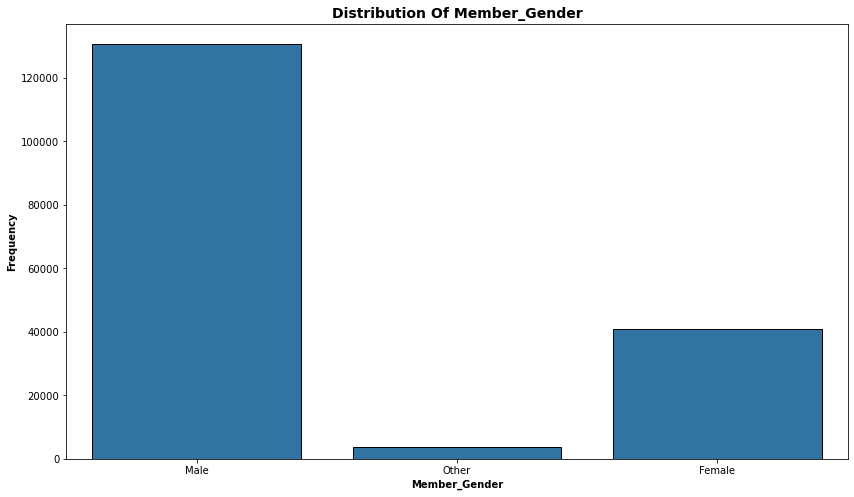

In [40]:
myCountPlot(ford_data, 'member_gender')

There are way more male riders than female riders, about three times more male riders. The "Other" gender is so significantly low and would not be needed for the purpose of this analysis.

In [41]:
#for the purpose of this analysis, i would drop the other column
Other = ford_data[ ford_data['member_gender'] == 'Other' ].index
  
# drop these row indexes from dataFrame
ford_data.drop(Other, inplace = True)


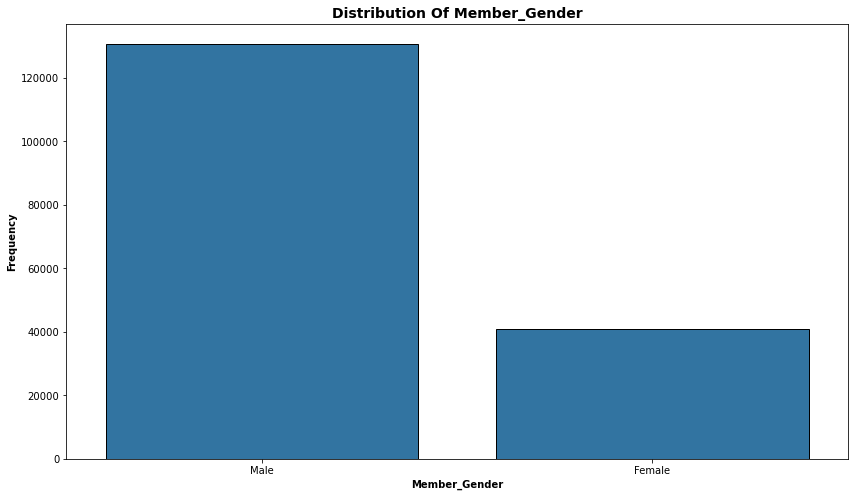

In [42]:
#confirm new plot of member_gender column
myCountPlot(ford_data,'member_gender')


What is the percentage distribution of the user type of Bike riders?

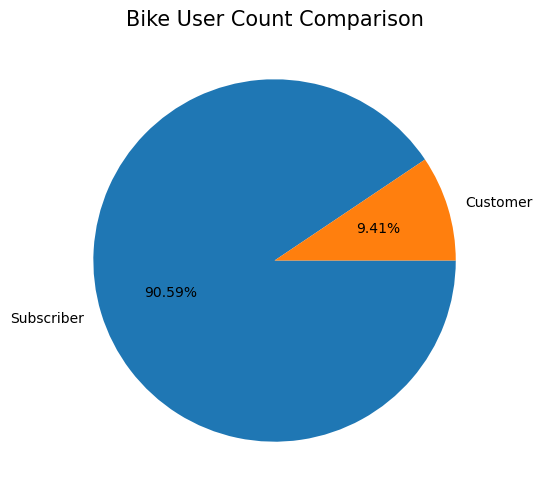

In [34]:
#pie chart of user type
plt.figure(figsize=(20,6), dpi=100)
sc = ford_data['user_type'].value_counts()
plt.pie(sc, labels = sc.index, startangle = 0,
        counterclock = False, autopct='%1.2f%%');
#plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);


The user type has two clear distributions, with Subscribers making up 90.59% of riders and Customers making up 9.41% of riders. 

Check for the busiest days of the week for when trips start and trip ends.

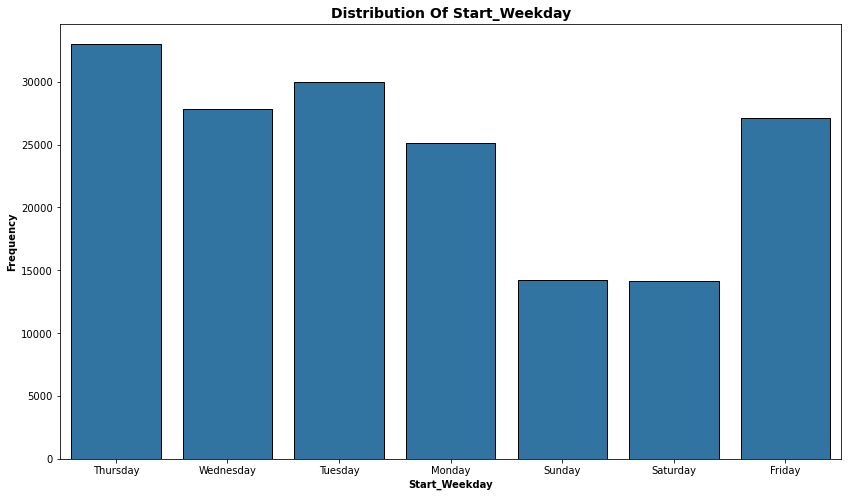

In [43]:
#horizontal bar plot of weekdays bike trips started
myCountPlot(ford_data, 'start_weekday')

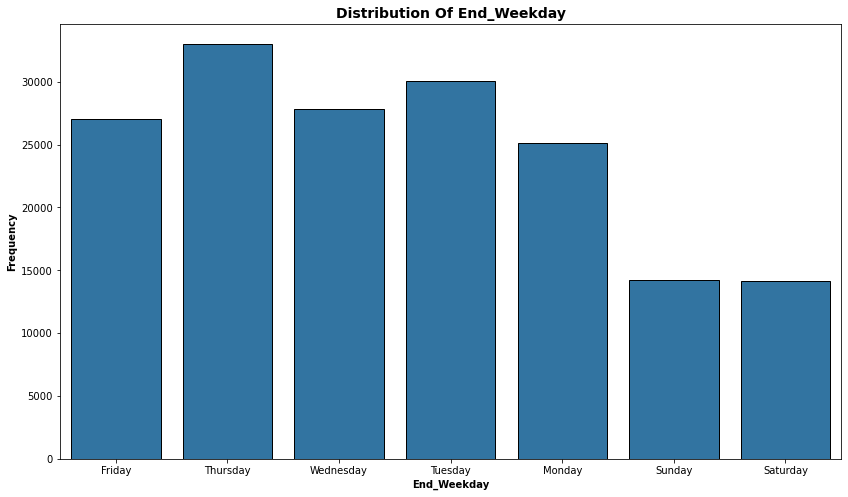

In [44]:
#horizontal bar plot of weekdays bike trips started
myCountPlot(ford_data, 'end_weekday')

The Start and End trips weekday distribution have almost the same exact distribution which is most likely an indication that most trips usually started and ended on the same day. It also shows that Thursday is the busiest day  and the weekends have the least patronage.

What is the Age distribution of bike riders?

In [46]:
#function to plot an histogram
def myHistPlot(df,var):

    #set plot dimensions
    plt.figure(figsize=[14,8])
    
    #plot
    #sb.countplot(data=df,x=var,edgecolor='black', color=base_color);
    sb.histplot(data=df, x=var,binwidth=20, bins=20, discrete=True, kde=True);

    
    #Add title and format it
    plt.title(f'''Distribution of {var}'''.title() , fontsize=14 , weight='bold')
    
    #Add y label and format it
    plt.xlabel(var.title( ),fontsize=10 ,weight='bold')

    #Add y label and format it
    plt.ylabel ('Frequency'.title(), fontsize=10 ,weight='bold')

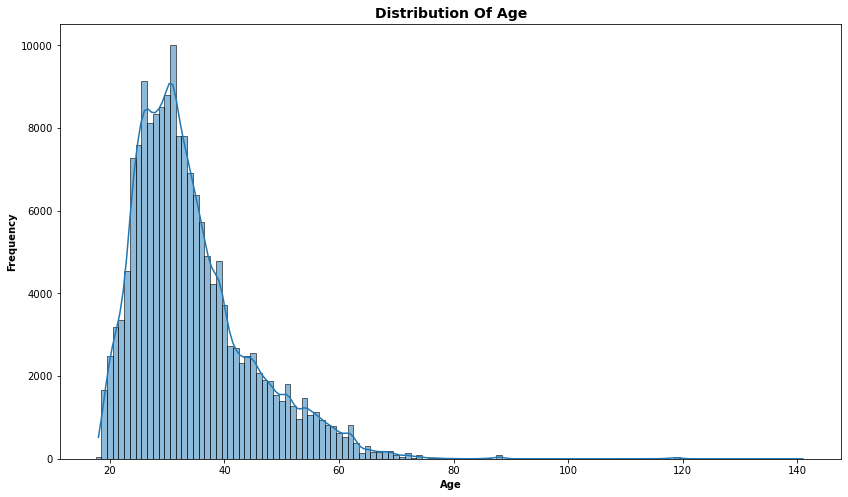

In [47]:
#histogram of Age distribution
myHistPlot(ford_data,'Age')

The age distribution shows that the most active age group of bike riders is 20-40years old. There is a decline from that going to as far as 140years old. This shows that the data in this case is not totally clean as it is almost impossible to find seniors above the age of 100 riding bicycles. 
For the purpose of this analysis, I would be dropping the rows for ages above 80.

In [48]:
#drop ages above 80
age_drop = ford_data[ (ford_data['Age'] > 80)].index
  
# drop these given row indexes from dataFrame
ford_data.drop(age_drop, inplace = True)


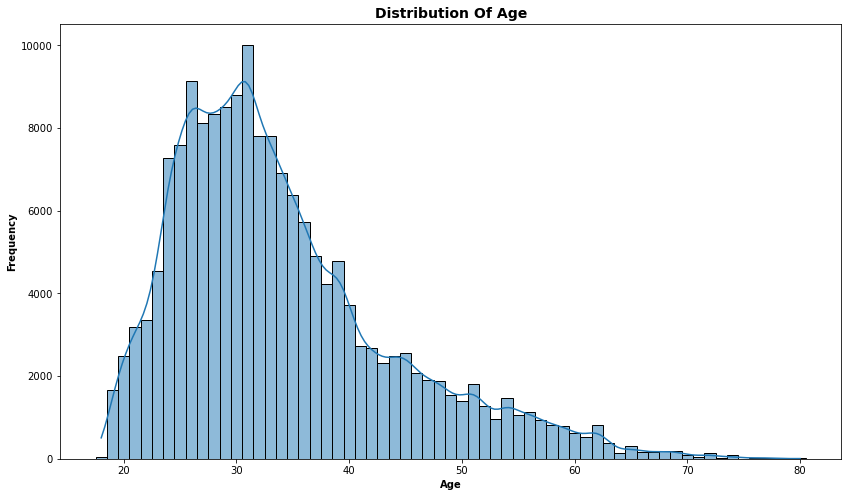

In [49]:
#histogram of Age distribution
myHistPlot(ford_data,'Age')

What is the top 10 ages of bike riders?

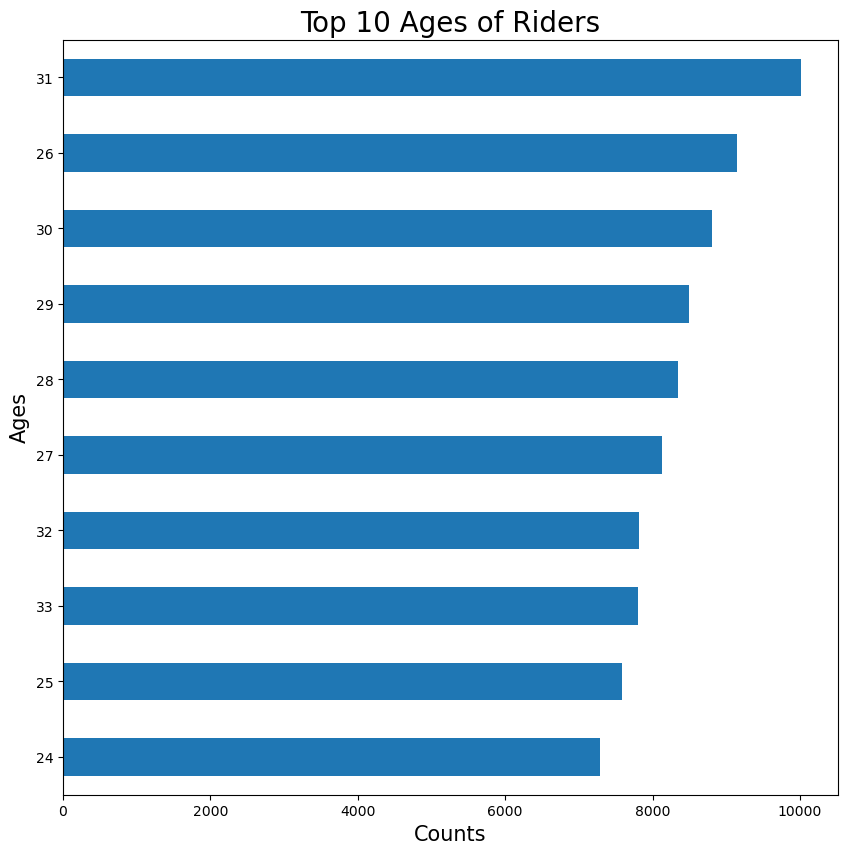

In [40]:
#to be more specific the top 10 most common ages
plt.figure(figsize=(10,10), dpi = 100)
plt.title('Top 10 Ages of Riders', fontsize=20)
plt.xlabel('Ride Count', fontsize=15)
plt.ylabel('Ages', fontsize=15)
ford_data.Age.value_counts(ascending=True).tail(10).plot.barh();


This bar plot distribution corrobrates the distribution in the histogram that most bike riders fall between the ages of 20-40years old. This plot goes further to show the specific top 10 age distribution of riders with 31years as the highest.

What are the busiest stations for start and end of trips?

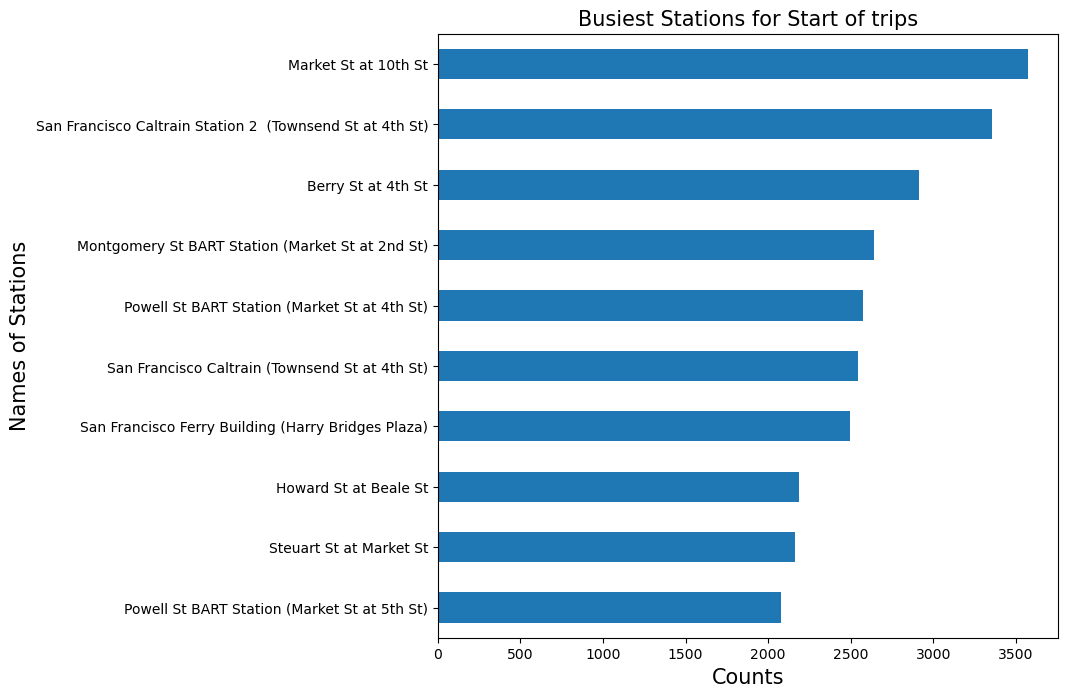

In [41]:
#top 10 stations for start of trips
plt.figure(figsize=(8,8), dpi = 100)
plt.title('Busiest Stations for Start of trips', fontsize=15)
plt.xlabel('Ride Count', fontsize=15)
plt.ylabel('Names of Stations', fontsize=15)
ford_data.start_station_name.value_counts(ascending=True).tail(10).plot.barh();


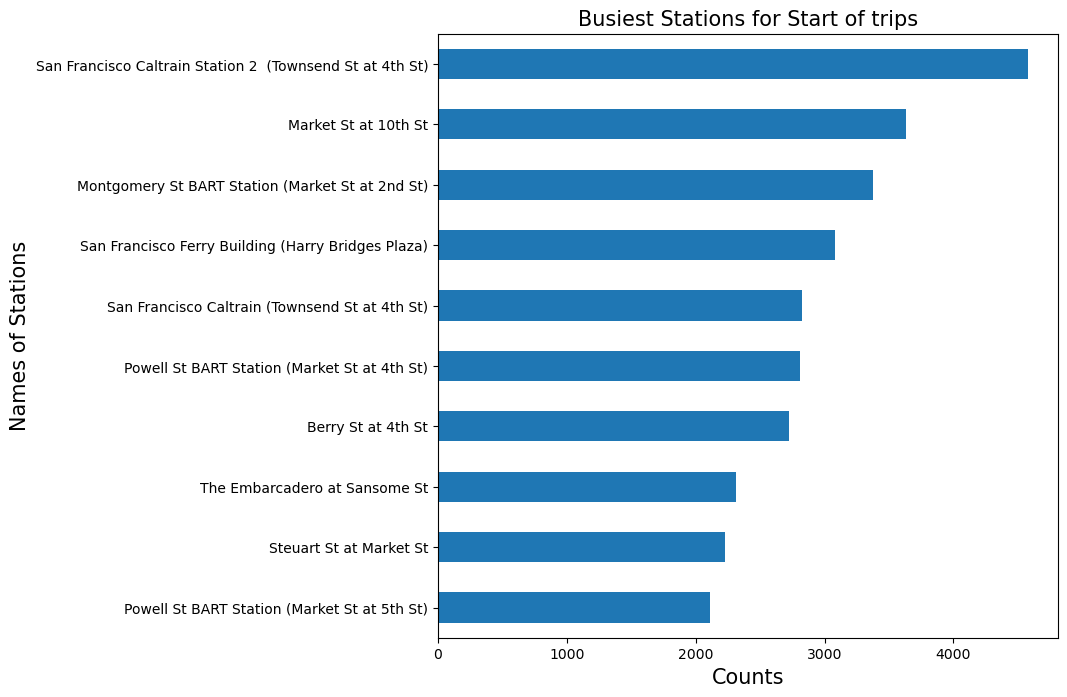

In [42]:
#top 10 stations for end of trips
plt.figure(figsize=(8,8), dpi = 100)
plt.title('Busiest Stations for End of trips', fontsize=15)
plt.xlabel('Ride Count', fontsize=15)
plt.ylabel('Names of Stations', fontsize=15)
ford_data.end_station_name.value_counts(ascending=True).tail(10).plot.barh();



The plots show that the end trips are more concentrated in some particular stations than the start trips. The busiest station for start trips has a count a bit over 3500 and the busiest station for end trips has a count of almost 4500 trips.

What are the busiest times of the day for starting and ending trips?

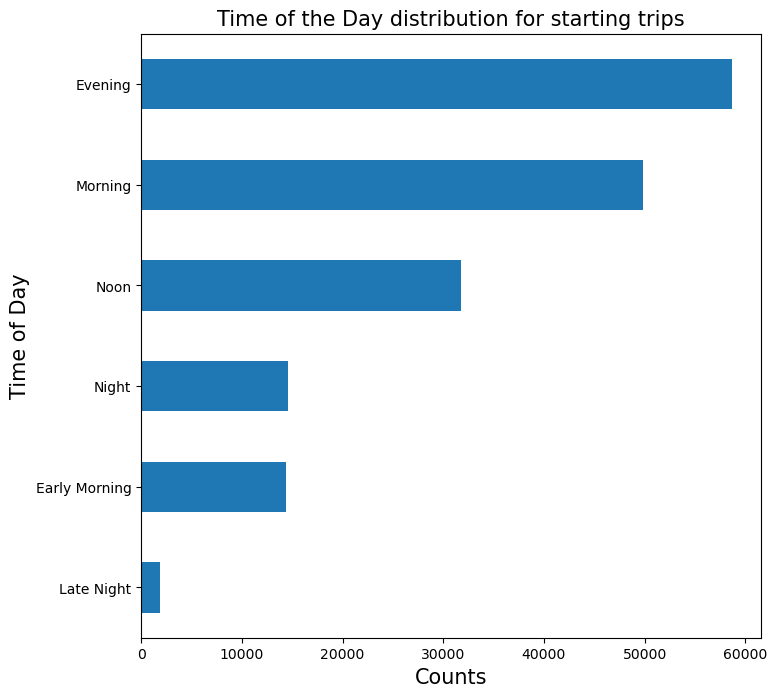

In [43]:
#Plot of ride distribution during the day
plt.figure(figsize=(8,8), dpi = 100)
plt.xlabel('Ride Count', fontsize=15)
plt.ylabel('Time of Day', fontsize=15)
plt.title('Time of the Day distribution for starting trips', fontsize=15)
ford_data.start_hour.value_counts(ascending=True).plot.barh();




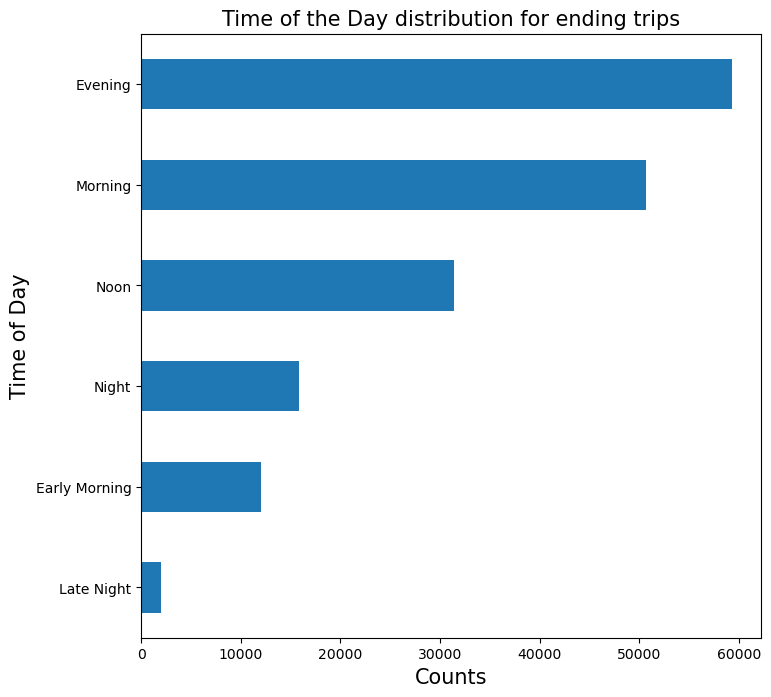

In [44]:
plt.figure(figsize=(8,8), dpi = 100)
plt.xlabel('Ride Count', fontsize=15)
plt.ylabel('Time of Day', fontsize=15)
plt.title('Time of the Day distribution for ending trips', fontsize=15)

ford_data.end_hour.value_counts(ascending=True).plot.barh();



The time of day distribution is roughly the same except that there are visibly less trips ending in the early morning then starting.


What is the duration of trip distribution?

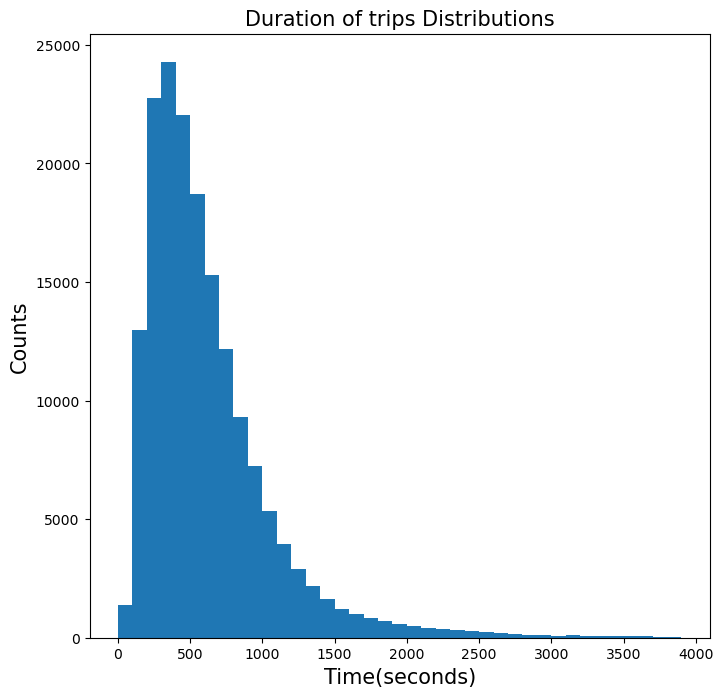

In [48]:
plt.figure(figsize=(8,8), dpi = 100)
plt.xlabel('Time(seconds)', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Duration of trips Distributions', fontsize=15)
bins = np.arange(0, 4000, 100)

plt.hist(ford_data.duration_sec, bins=bins);


The duration of rides in seconds is left-skewed, showing that there are lesser count of rides for longer seconds. The plot shows a peak around 500-600seconds meaning most rides are usually about 10 minutes.

What are the most used bikes according to number of rides?

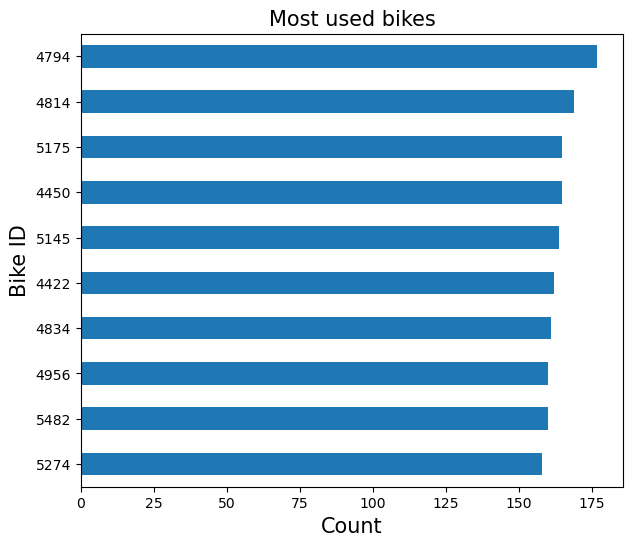

In [51]:
#to be more specific the top 10 most used bikes
plt.figure(figsize=(7,6), dpi = 100)
plt.title('Most used bikes', fontsize=15)
plt.xlabel(' Ride Count',fontsize=15)
plt.ylabel('Bike ID', fontsize=15)
ford_data.bike_id.value_counts(ascending=False).tail(10).plot.barh();



The most used bikes as seen in the plot above are Bikes with IDs: 4794,4814,5175,4450, 5145,4422,4834,4956,5482 and 5274.

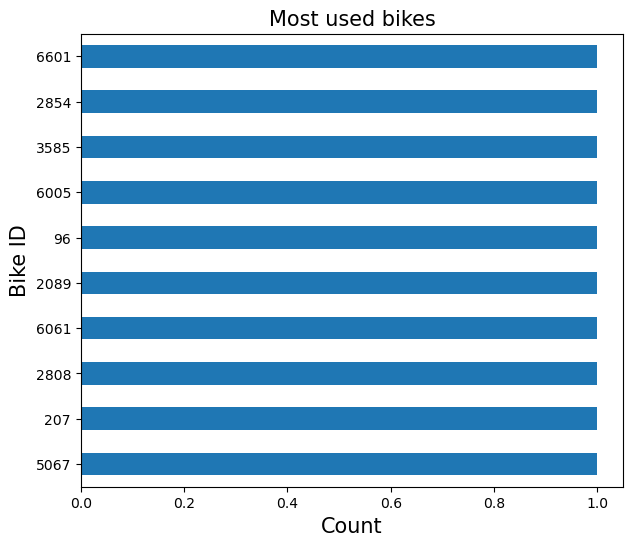

In [57]:
#plot of the least used bikes
plt.figure(figsize=(7,6), dpi = 100)
plt.title('Most used bikes', fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Bike ID', fontsize=15)
ford_data.bike_id.value_counts(ascending=True).head(10).plot.barh();


### Discuss of the distribution(s) of variable(s) of interest. Unusual points and Transformations.

> The features of variables of focus for this project:

1. The trip duration (in seconds): The distribution of the duration of rides in seconds is left-skewed, showing a lesser count of rides for a longer time(seconds). The plot shows a peak around 500-600seconds meaning most rides are usually about 10 minutes.

2. The start and end time of the trip: The start and end time had to be changed to a DateTime data type and broken into subsets of Months, Weekdays, and Hours. I ignored the months because the dataset was for the month of February. The distribution of the weekdays and hours for both start and end trips are very similar and could possibly be used interchangeably to make observations and deductions.

3. Station names: The station names are a very important part of this analysis. In the distribution to find the names of the busiest stations, there were no discrepancies in the station names.

4. Bike's ID: The data type of Bike ID was changed from int to object to avoid confusion during visualization. The distribution of the Top 10 Bike IDs shows a normal distribution. The distribution of the least used Bikes seemed pointless because of the completely even distribution. Hence, it will need additional context.

5. User type: The user type pie chart showed that there were way more subscribers than regular customers.

6. Member birth year: This variable was used to calculate the ages of riders by subtracting it from the current year. The histogram distribution of ages is left-skewed, indicating that with the increasing age of riders, there are lesser trips.

7. Member gender: The member gender column distribution showed a normal count distribution of Males, Females, and Others.

### Operations performed on the data to tidy, adjust, or change the form of the data.

> 
1. The trip duration (in seconds): For this variable, I decided to create a duration in minutes column because I felt it was a more quantifiable measure of time.

2. The start and end time of the trip: The start and end time had to be broken into subsets of Months, Weekdays, and Hours.

3. Station names: No operations had to be performed on this variable

4. Bike's id: There was no need for tidying of this variable

5. User type: No operations had to be performed on this variable

6. Member birth year: This had to be used to calculate Age as it is easier to use to make observations. Ages above 80(to the max of about 140) were also dropped as there is a likelihood of ages older than that being an error. Even if it wasn't an error, for this analysis, it is not needed.

7. Member gender: For the member gender, I tidied the data by dropping the "Others" entries as it is unnecessary for this analysis.



<a id='bivariate'></a>
## Bivariate Exploration

> In this section, I investigated relationships between pairs of variables in the data.

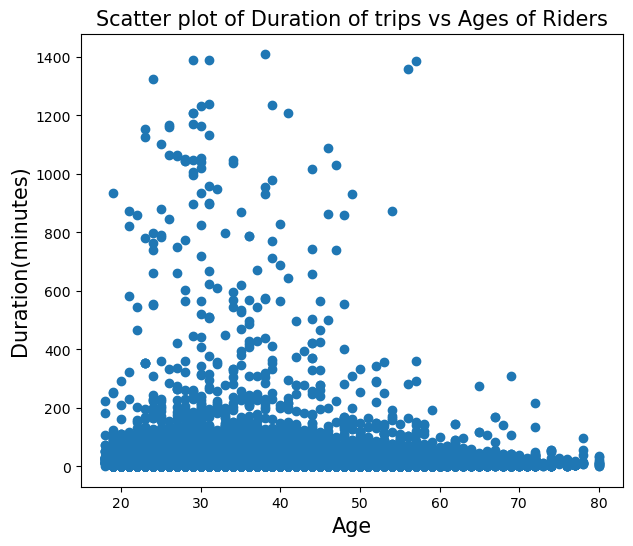

In [73]:
#scatter plot of duration vs age
plt.figure(figsize=(7,6), dpi = 100)
plt.title('Scatter plot of Duration of trips vs. Ages of Riders', fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Duration(minutes)', fontsize=15)
plt.scatter(data = ford_data, x = 'Age', y = 'duration_minutes');


The scatterplot has a rough negative correlation indicating that with increasing age the trips become shorter.

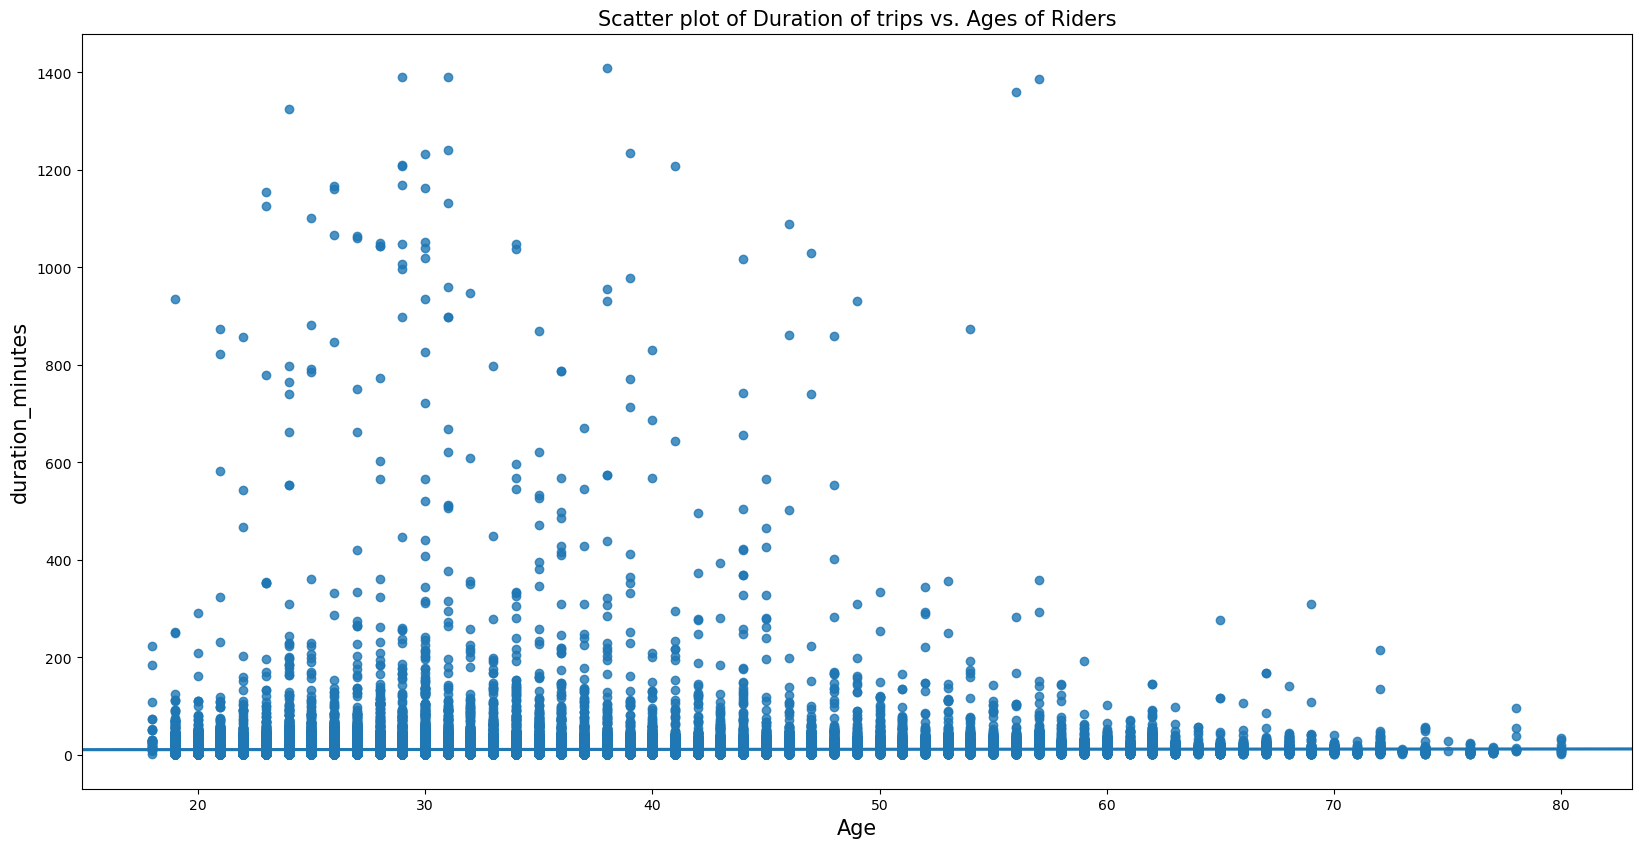

In [76]:
#scatter plot with jitters
plt.figure(figsize=(20,8), dpi = 100)
plt.title('Scatter plot of Duration of trips vs. Ages of Riders', fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Duration(minutes)', fontsize=15)
sb.regplot(data = ford_data, x = 'Age', y = 'duration_minutes', truncate=False);


To avoid overplotting, I plotted the scatter plot with jitters. The same negative correlation is observed.

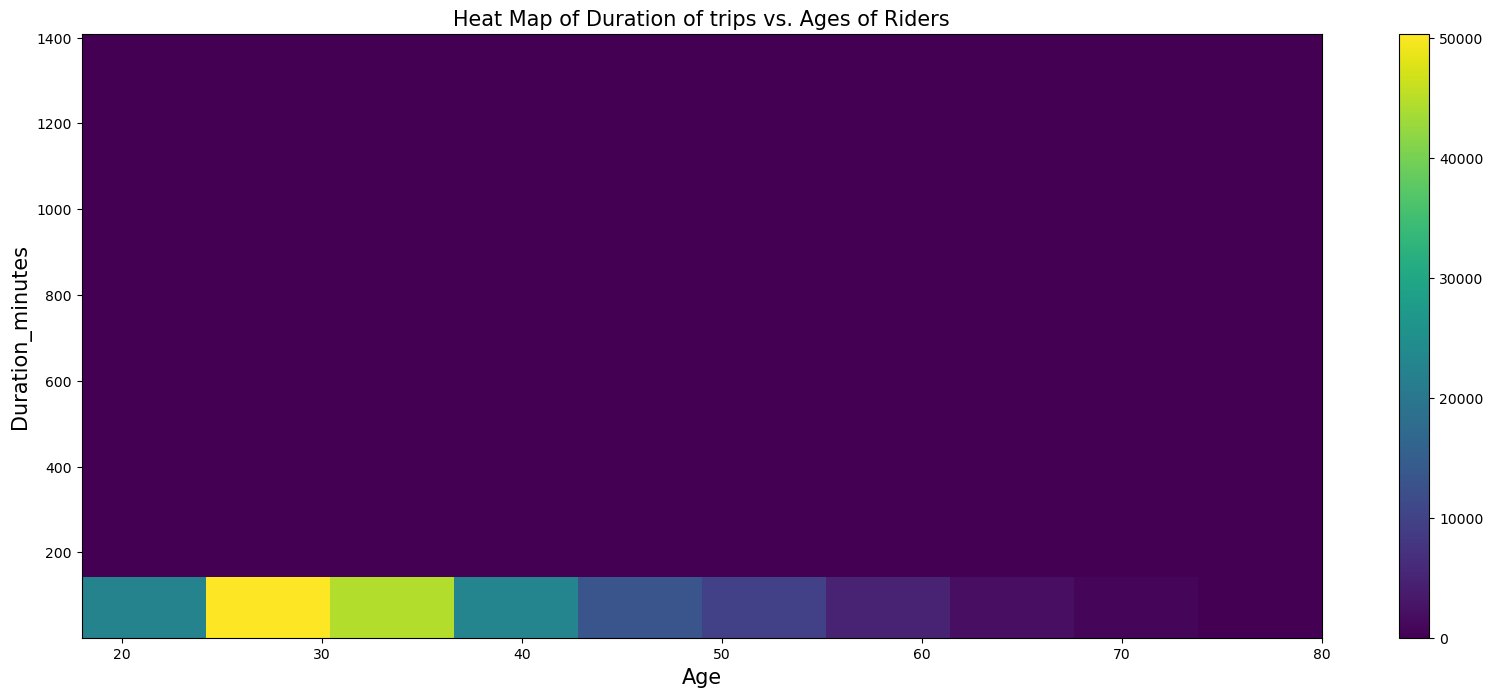

In [79]:
#heat map of duration vs age
plt.figure(figsize=(20,8), dpi = 100)
plt.title('Heat Map of Duration of trips vs. Ages of Riders', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Duration_minutes', fontsize=15);
plt.hist2d(data = ford_data, x = 'Age', y = 'duration_minutes');
plt.colorbar();



The heat map shows the observation clearer, we can see ages 25-31 have the most active riders, followed by ages 31-35, then agest 18-20 and 35-40. It also shows a clear decline of riders riding for longer with increasing age from 40.

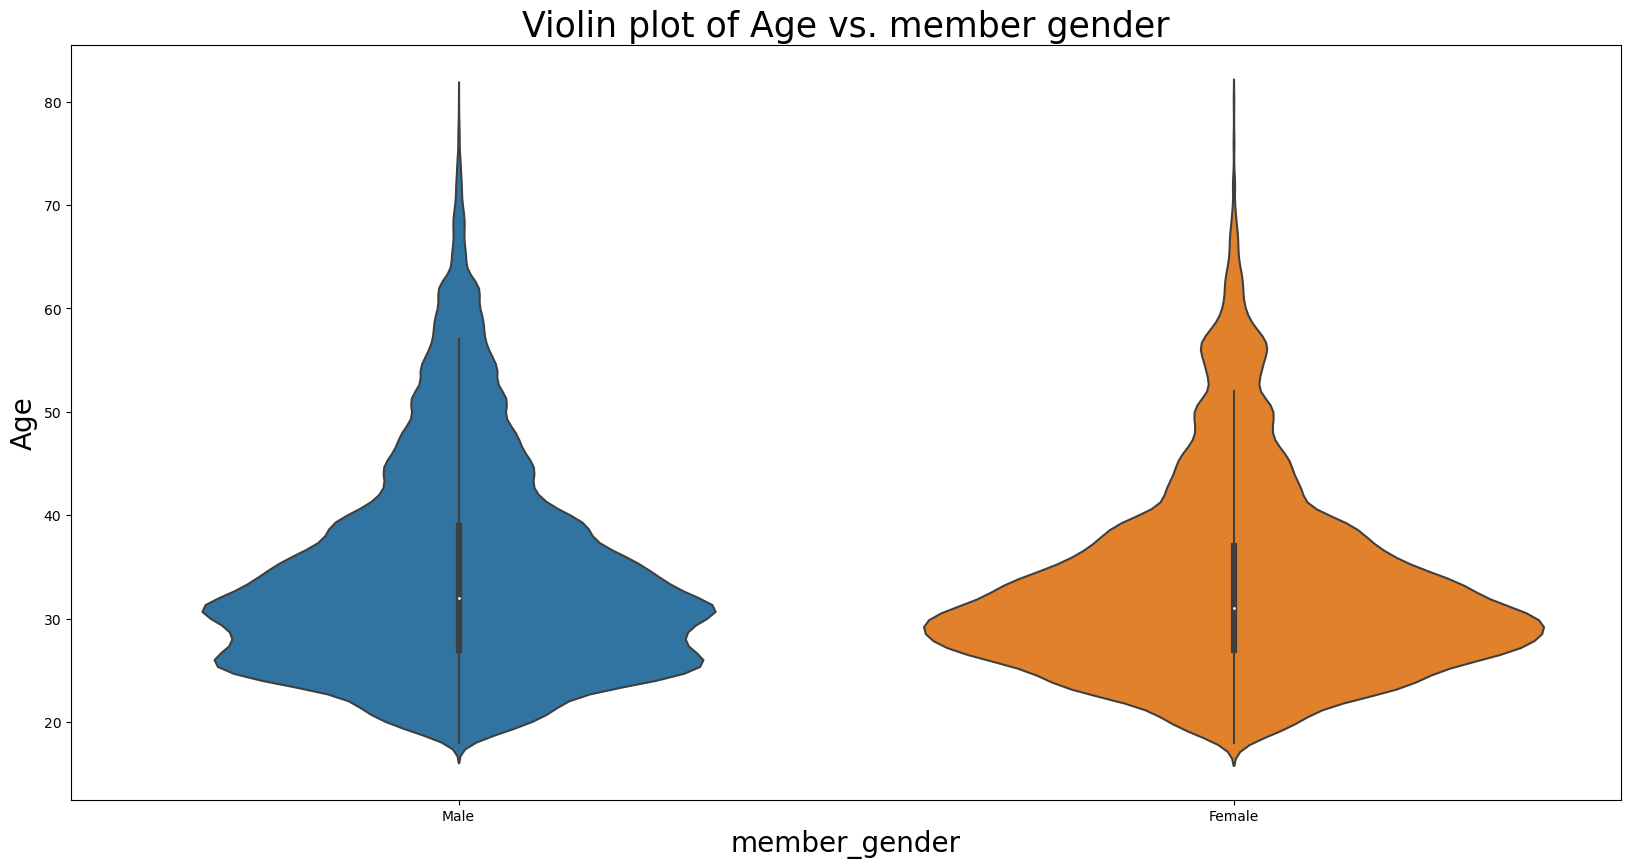

In [85]:
plt.figure(figsize=(20,10), dpi = 100)
plt.title('Violin plot of Age vs. Member gender', fontsize=25)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Gender', fontsize=20);
sb.violinplot(data=ford_data, x='member_gender', y='Age');

The violin plot shows the median age of malea nd female riders ro be 31. It also confirms that the most active riders for males are between the ages of 26-33 while for females there's a sharp concentration around age 30.

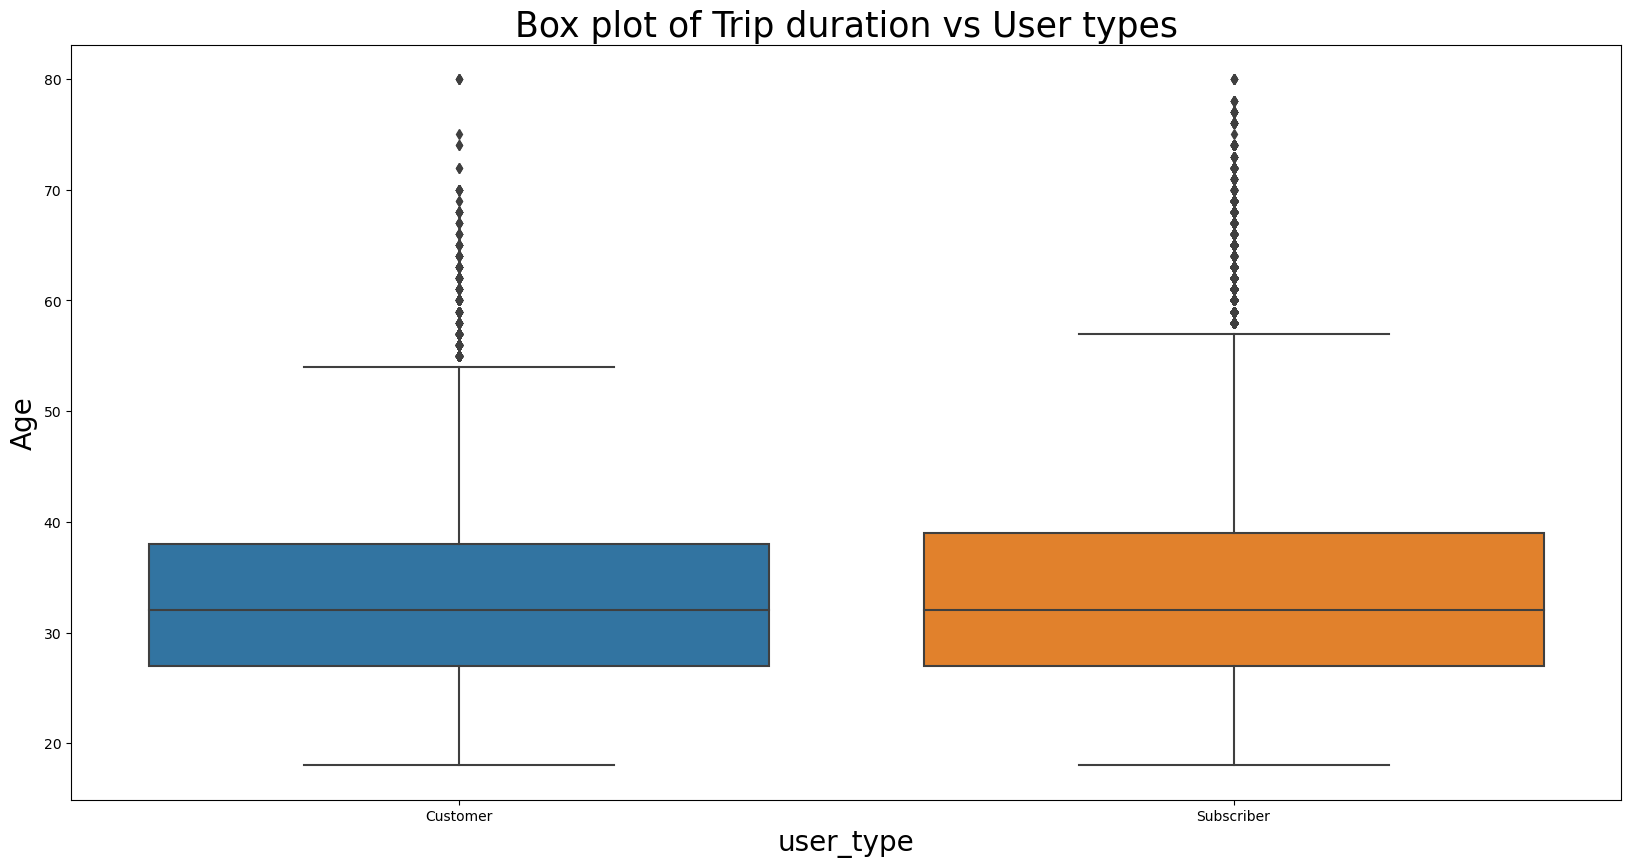

In [89]:
#boxplot of age vs subscribers
plt.figure(figsize=(20,10), dpi = 100)
plt.title('Box plot of Trip duration vs User types', fontsize=25)
plt.xlabel('User Type', fontsize=20)
plt.ylabel('Trip Duration(minutes)', fontsize=20);
sb.boxplot(x='user_type', y='Age', data = ford_data);


The box plot shows that for both user types- Customer and Subscriber- the median age of the most active riders is roughly 31.
The first quartile is between 27 and 31. The third quartile between 32 and 38. It also shows that the max age excluding outliers is 65 for customers and 66 for subscribers.

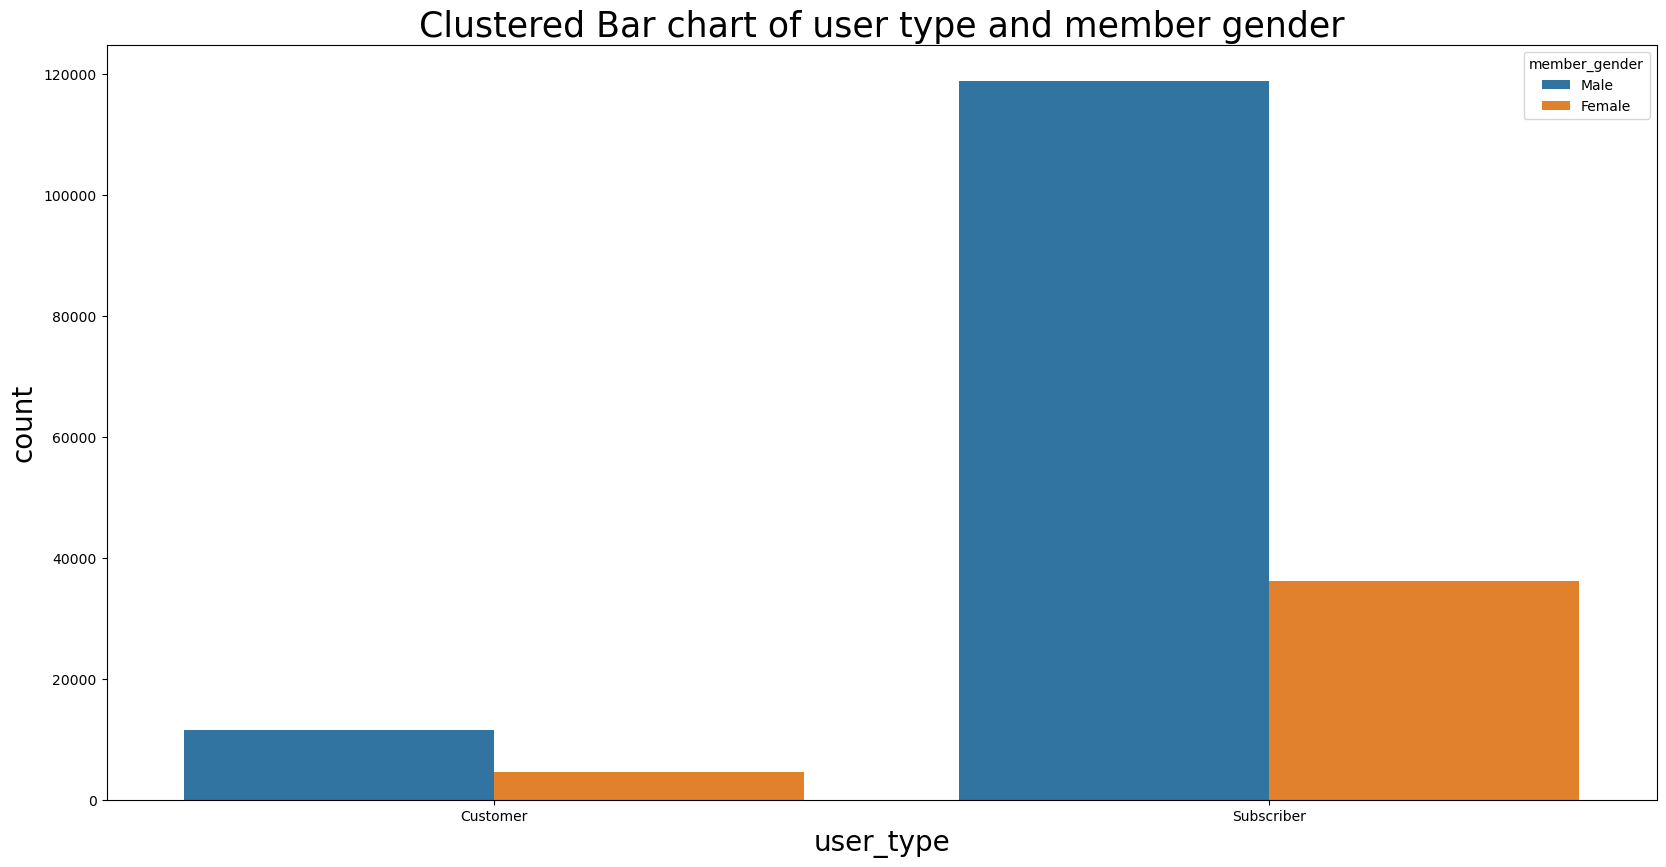

In [90]:
#bar chart of user tyoe distribution of male and female
plt.figure(figsize=(20,10), dpi = 100)
plt.title('Clustered Bar chart of user type and member gender', fontsize=25)
plt.xlabel('User Type', fontsize=20)
plt.ylabel('Count', fontsize=20);
sb.countplot(data = ford_data, x = 'user_type', hue = 'member_gender');

The clustered bar chart shows that for both customer and subscriber, there are way more male riders than female riders. Male subscribers are about triple the amount of female subscribers.

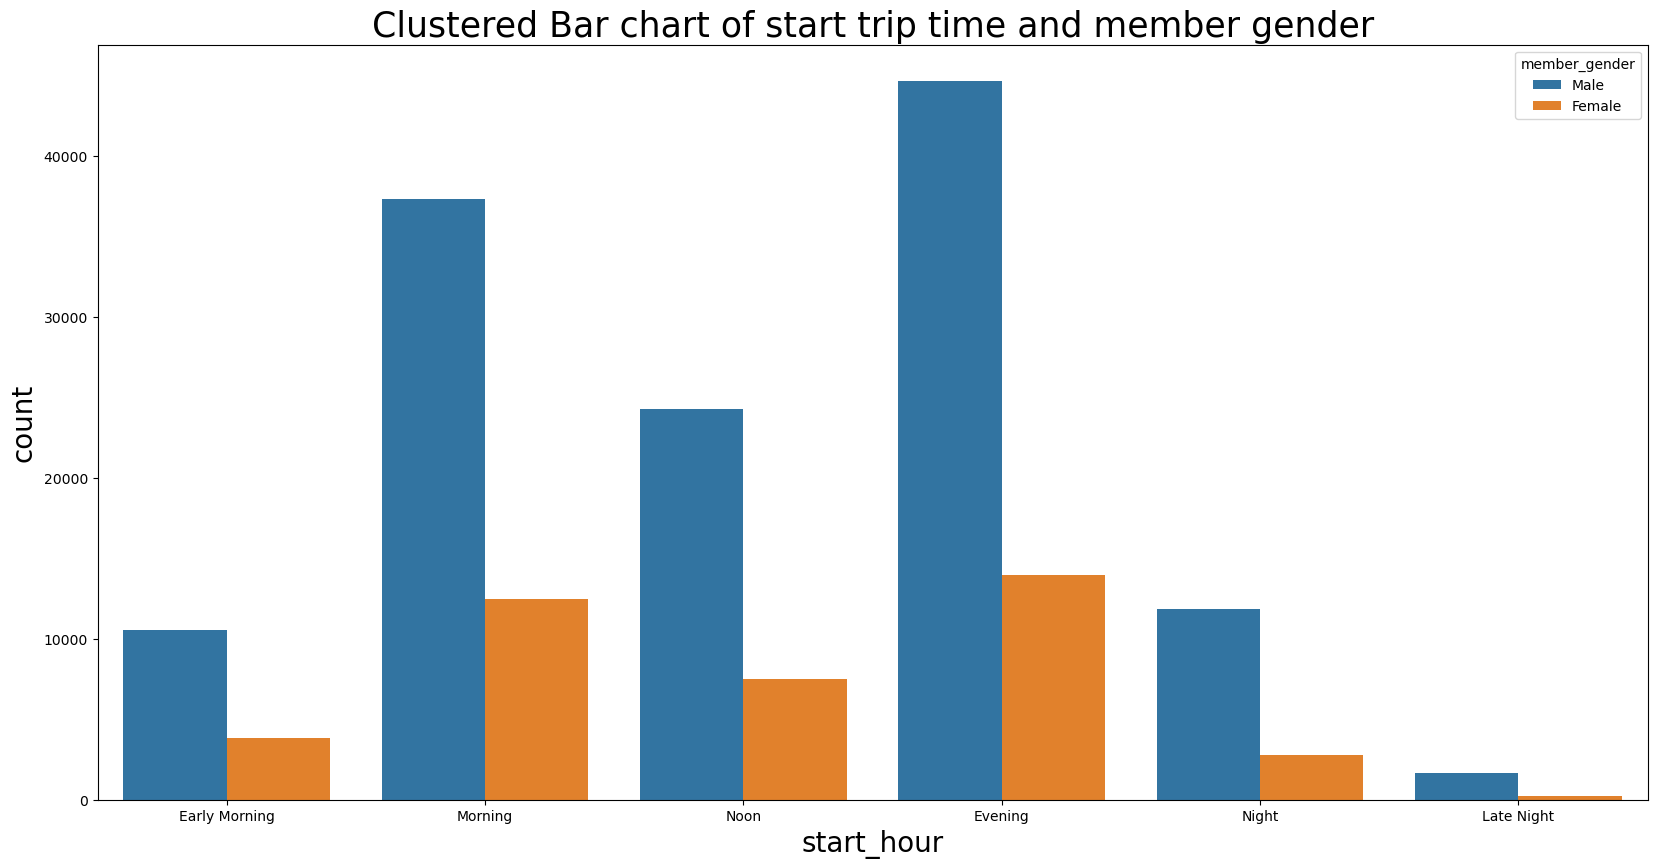

In [92]:
#bar chart of ride count for males and females at certain points in the day
plt.figure(figsize=(20,10), dpi = 100)
plt.title('Clustered Bar chart of start trip time and member gender', fontsize=25)
plt.xlabel('Time of the day', fontsize=20)
plt.ylabel('Count', fontsize=20);
h_order=['Early Morning','Morning', 'Noon', 'Evening','Night','Late Night']
sb.countplot(data = ford_data, x = 'start_hour', hue = 'member_gender', order=h_order);

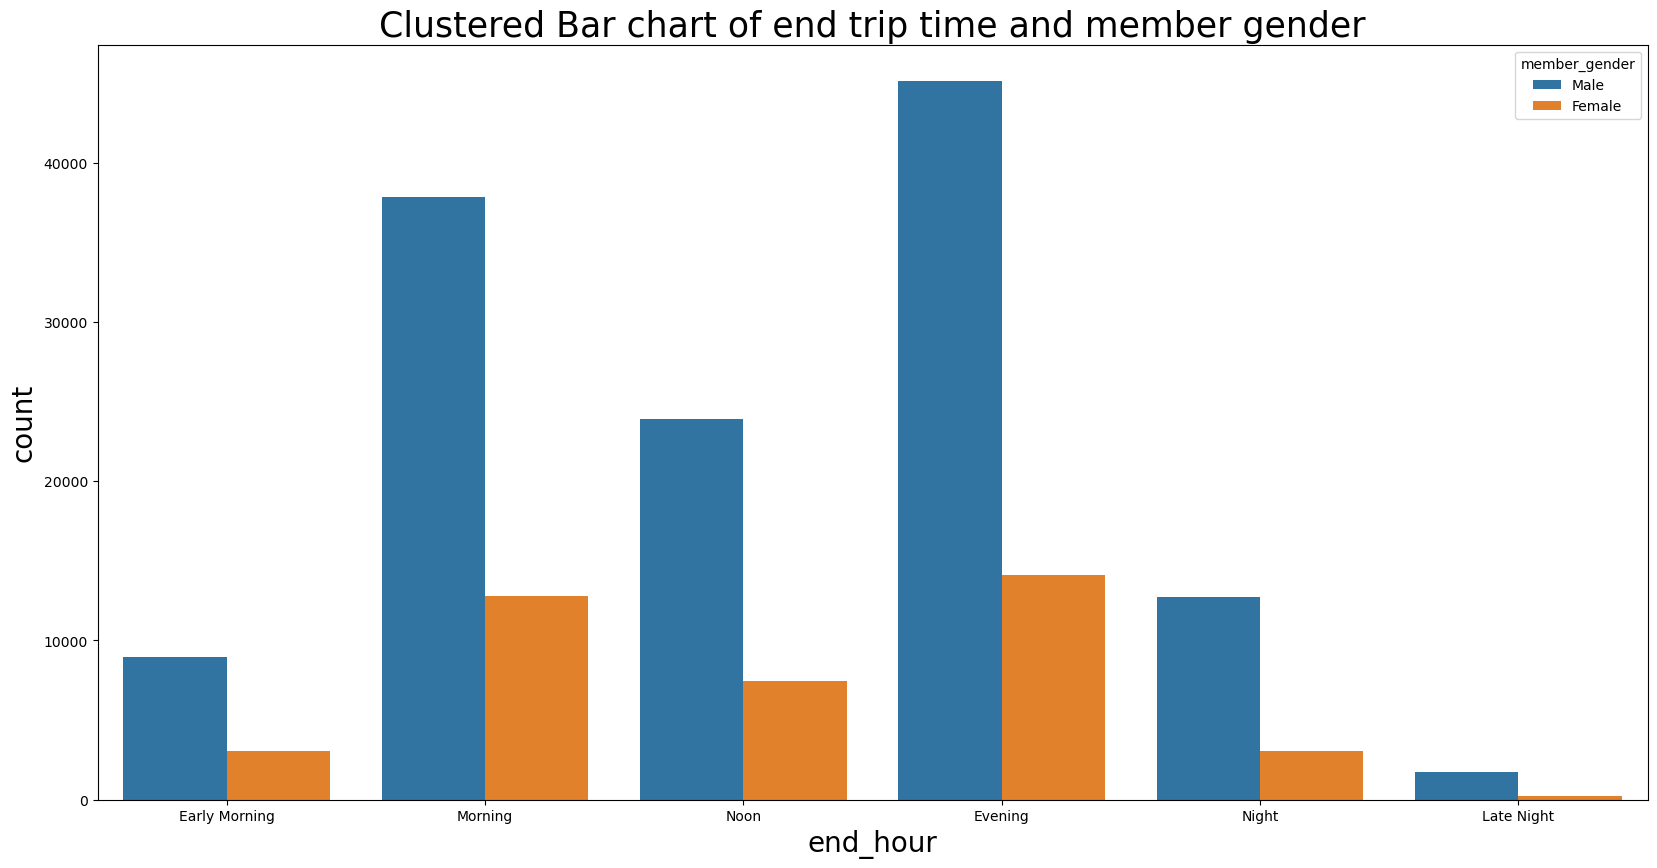

In [93]:
#bar chart of ride count for males and females at certain points in the day
plt.figure(figsize=(20,10), dpi = 100)
plt.title('Clustered Bar chart of end trip time and member gender', fontsize=25)
plt.xlabel('Time of the day', fontsize=20)
plt.ylabel('Count', fontsize=20);
sb.countplot(data = ford_data, x = 'end_hour', hue = 'member_gender', order=h_order);

The clustered bar charts show the distribution of men and women's preferred time for start and end trips. It can be seen that most trips start in the evening followed closely by mornings. It also shows that the number of trips taken by men is more than that of women.

In [94]:
#grouping stations according to duration of trips
bus_station=ford_data.groupby('start_station_name')['duration_minutes'].sum()
bs=bus_station.nlargest(5)

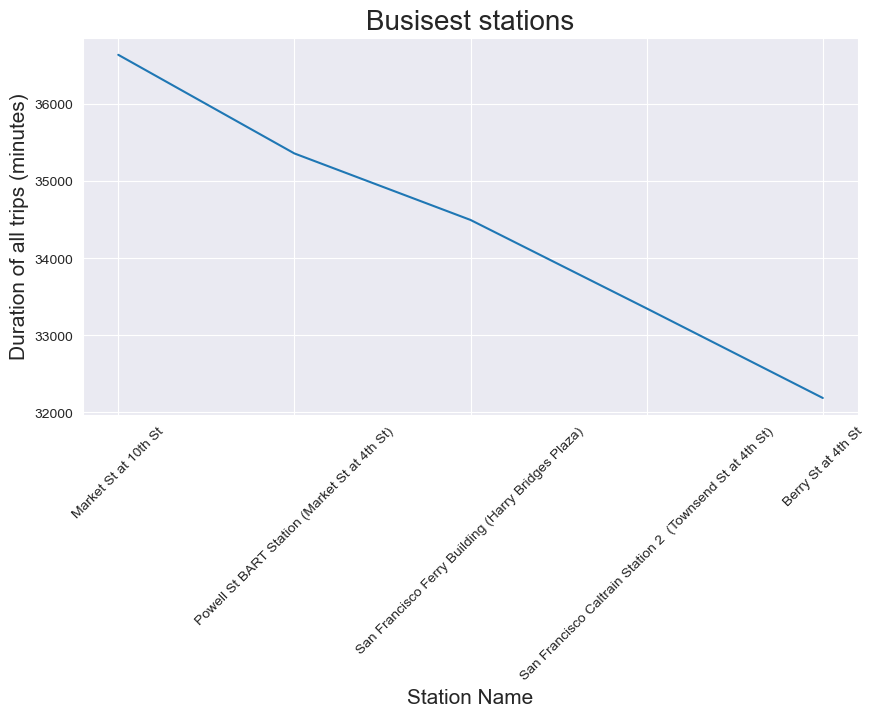

In [95]:
#line plot of busiest stations according to duration of trips
sb.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Station Name', fontsize = 15)
plt.ylabel('Duration of all trips (minutes)', fontsize = 15)
plt.xticks(rotation=45)
plt.title('Busisest stations for Start trips', fontsize = 20)
plt.plot(bs);

In [96]:
#grouping stations according to duration of trips
bus_endstation=ford_data.groupby('end_station_name')['duration_minutes'].sum()
bes=bus_station.nlargest(5)

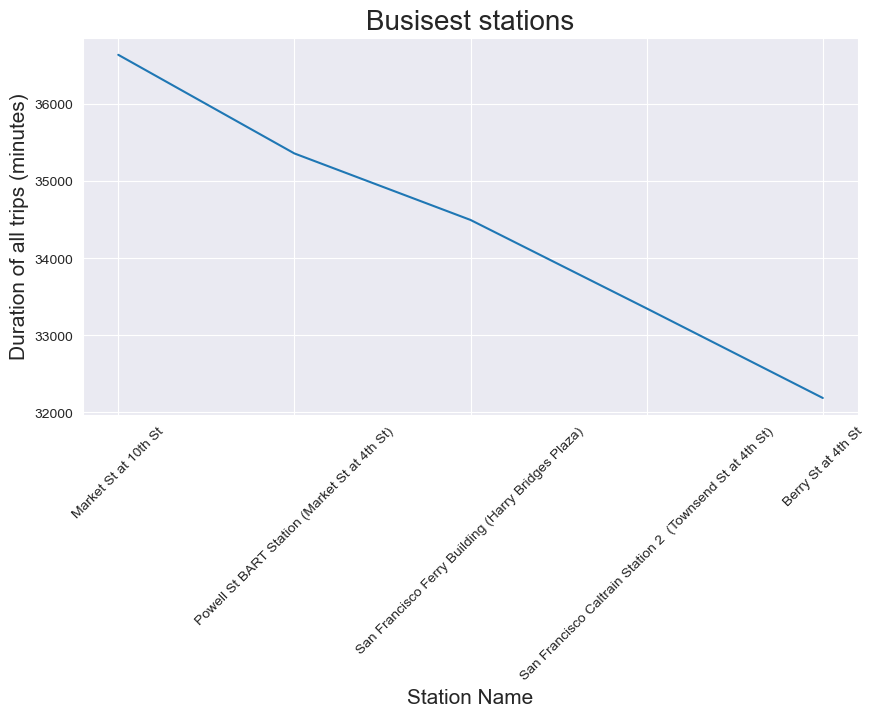

In [97]:
#line plot of busiest stations according to duration of trips
sb.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Station Name', fontsize = 15)
plt.ylabel('Duration of all trips (minutes)', fontsize = 15)
plt.xticks(rotation=45)
plt.title('Busisest stations for End trips', fontsize = 20)
plt.plot(bes);

The line graphs show the busiest stations based on the duration of trips of riders. It can be seen that **Market St at 10th St** have the riders with the longest duration of trips. This makes a lot of sense since it also has the most started trips and 2nd most ended trips.

In [175]:
# Subset the dataset to top 4 stations with high duration of trips 
locs = ['Market St at 10th St',
        'Powell St BART Station (Market St at 4th St)',
        'San Francisco Ferry Building (Harry Bridges Plaza)',
                'Berry St at 4th St']
top4_df = ford_data.loc[ford_data['start_station_name'].isin(locs)]


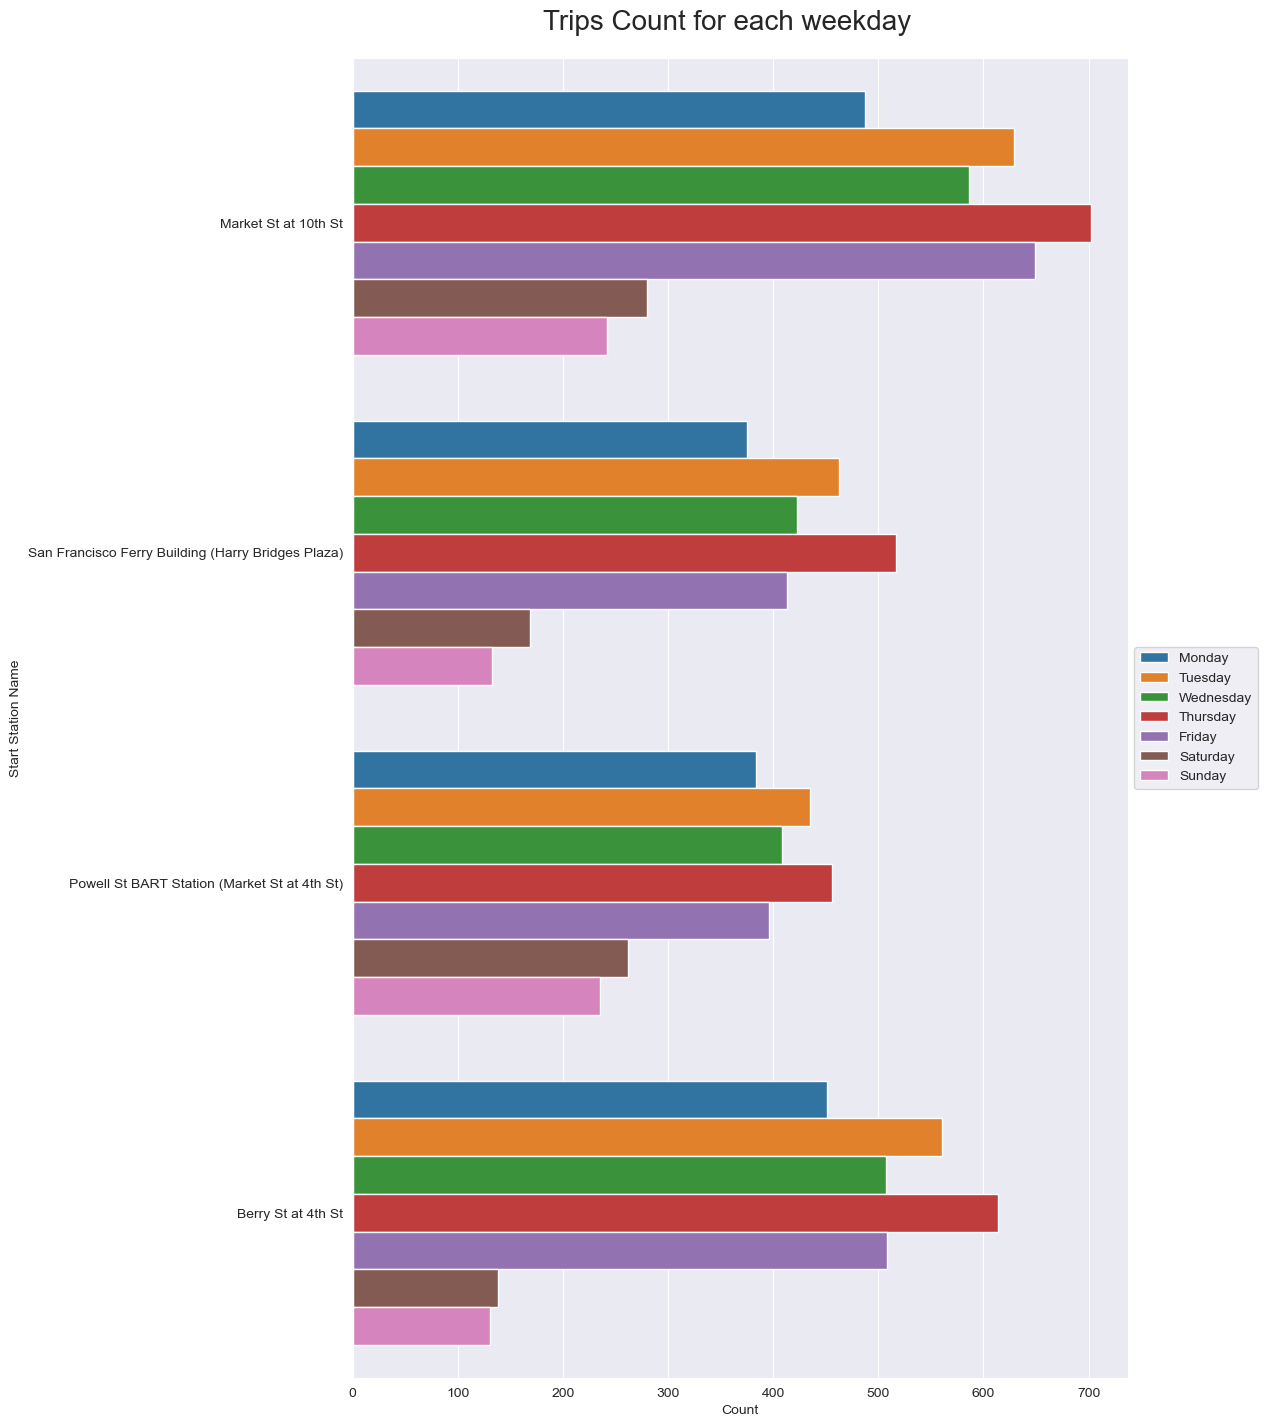

In [177]:
#bar plots for busiest stations on different days of the week
fig = plt.figure(figsize=(10,16), dpi=100)
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count for each weekday', fontsize=20)
sb.countplot(data=top4_df, y='start_station_name', hue='start_weekday')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');

The clustered horizontal bar chart shows the trip counts of each of the stations on different days. All stations have thursday as a peak day but for the other days of the week, the trip counts really varies from station to station.

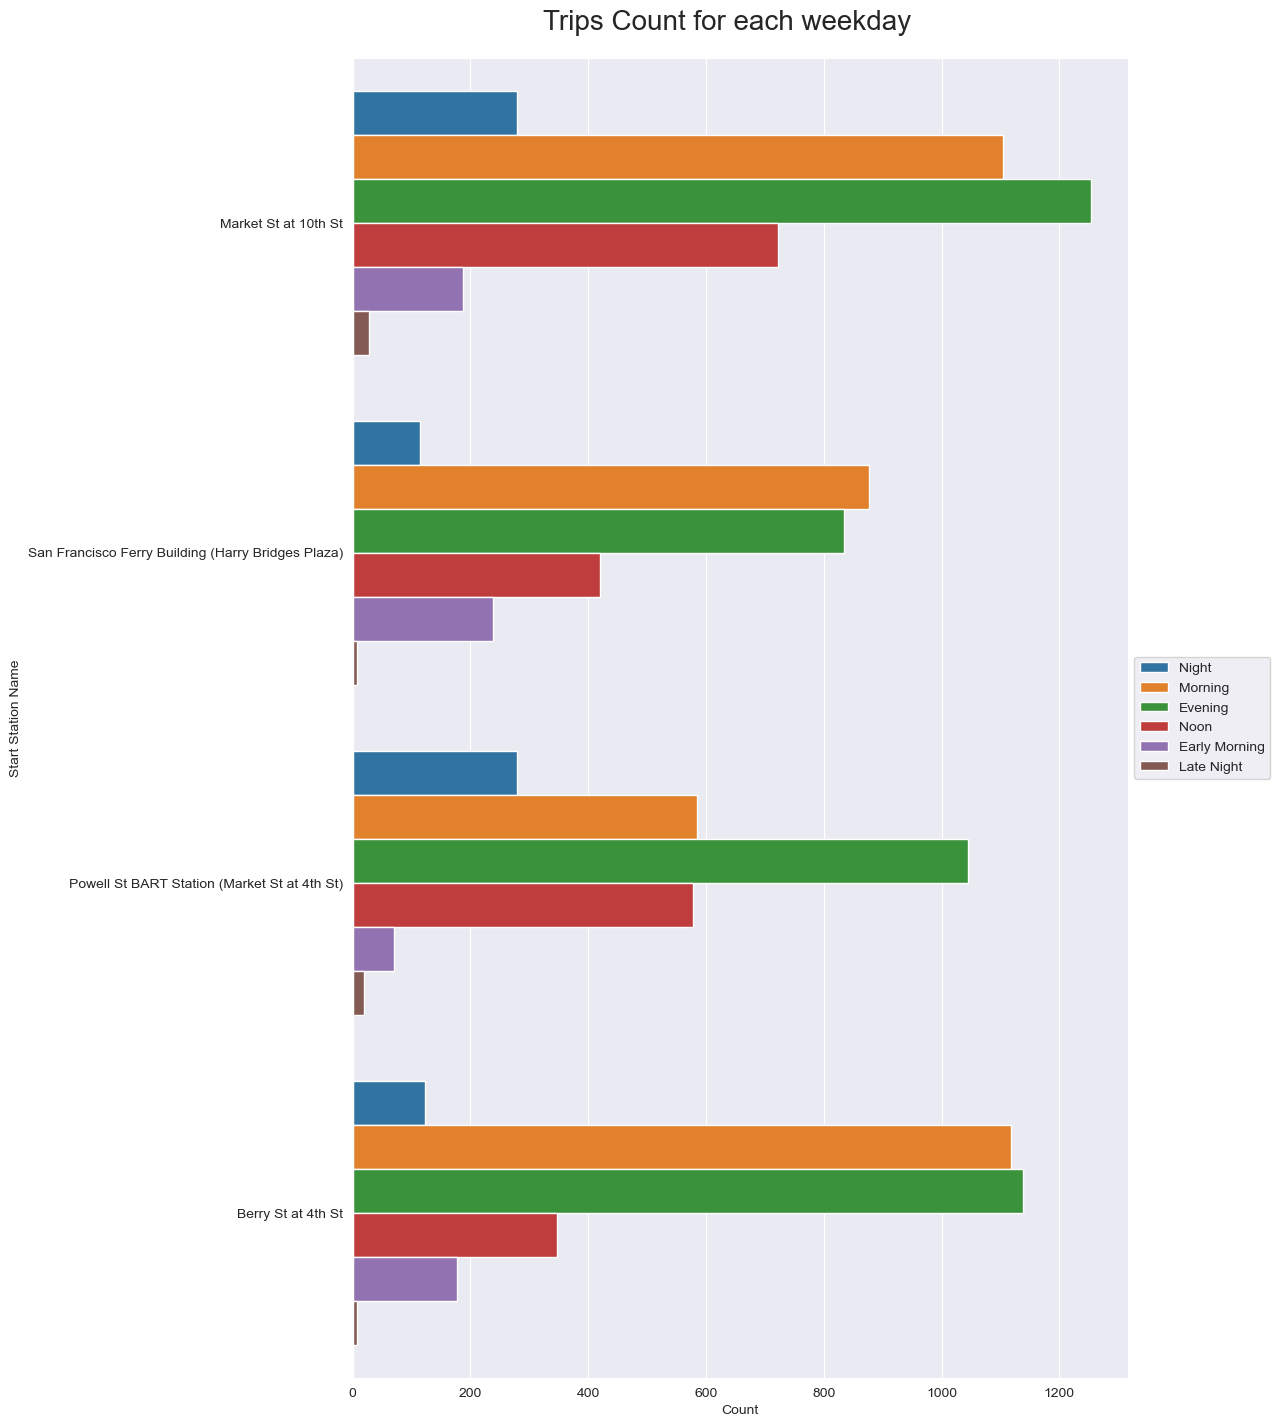

In [178]:
#bar plots for busiest stations at different times of the day
fig = plt.figure(figsize=(10,16), dpi=100)
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count for each weekday', fontsize=20)
sb.countplot(data=top4_df, y='start_station_name', hue='start_hour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');

The clustered horizontal bar chart shows the trip counts of each of the stations at different times of the day. The station has varying peak time for each period of the day. Market St at 10th St has the most traffic in the evenings while San Francisco Ferry Building (Harry Bridges Plaza) has it's busiest time in the mornings.

In [99]:
start_weekday = ford_data.groupby(['start_weekday', 'member_gender']).size()

start_weekday = start_weekday.reset_index(name='count')

start_weekday = start_weekday.pivot(index = 'start_weekday', columns = 'member_gender', values = 'count')

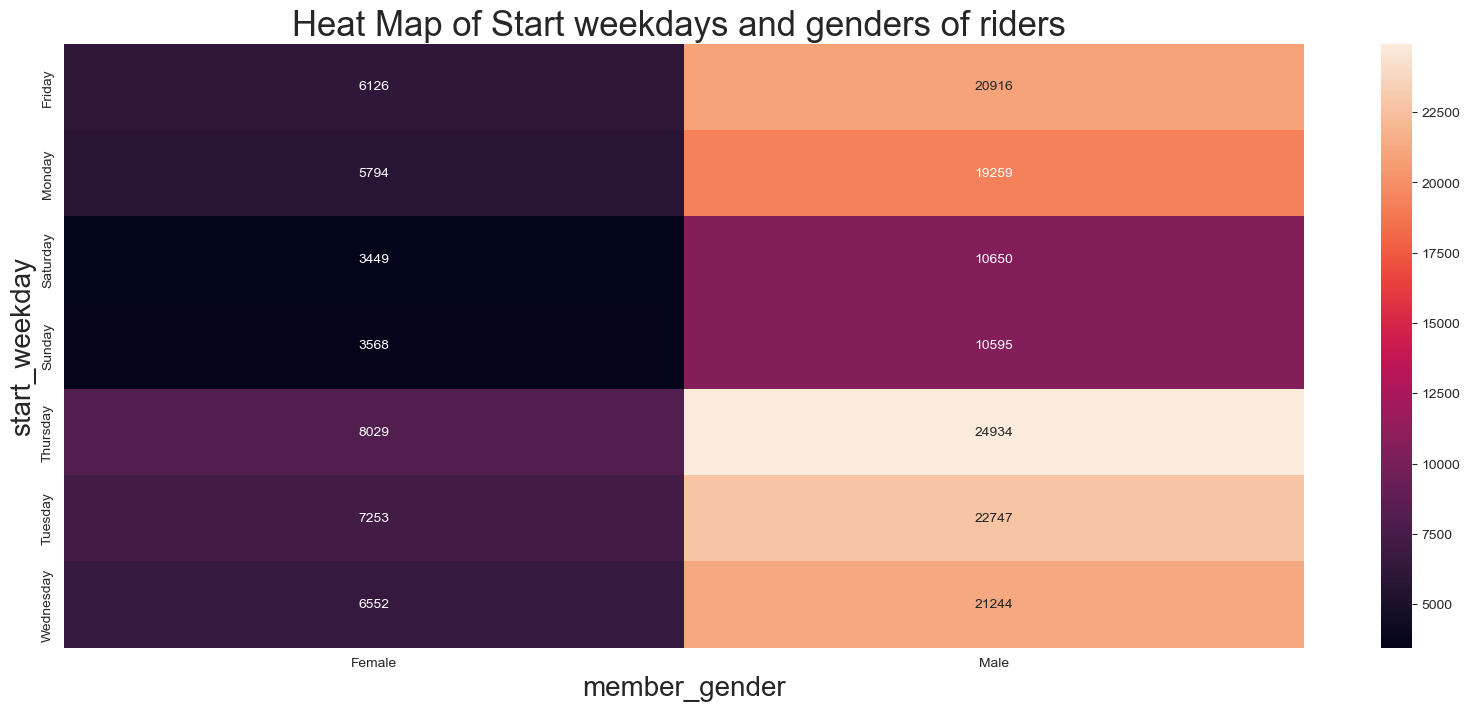

In [111]:

plt.figure(figsize=(20,8), dpi = 100)
plt.title('Heat Map of start weekdays and genders of riders ', fontsize=25)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Weekdays', fontsize=20);
sb.heatmap(start_weekday, annot = True, fmt = 'd');

In [107]:
end_weekday = ford_data.groupby(['end_weekday', 'member_gender']).size()

end_weekday = end_weekday.reset_index(name='count')

end_weekday = end_weekday.pivot(index = 'end_weekday', columns = 'member_gender', values = 'count')



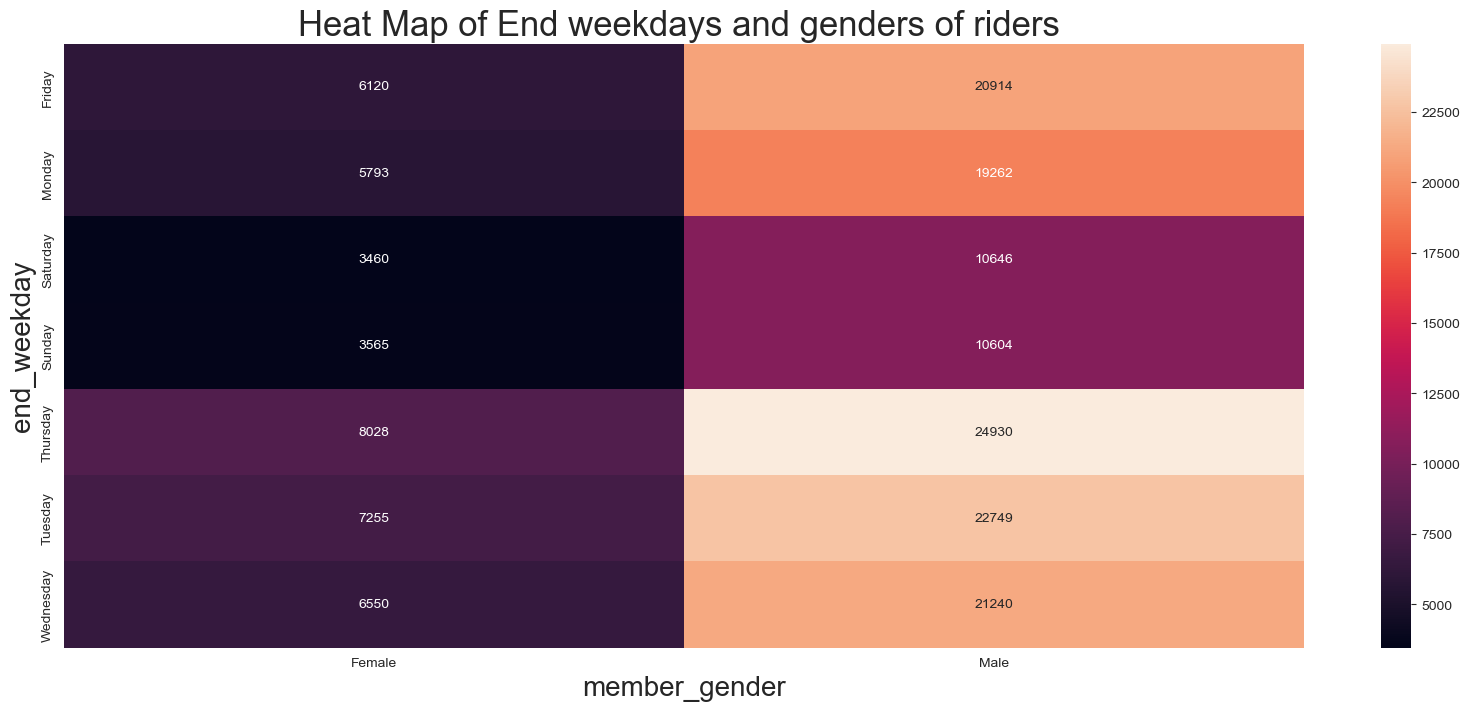

In [109]:

plt.figure(figsize=(20,8), dpi = 100)
plt.title('Heat Map of end weekdays and genders of riders ', fontsize=25)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Weekdays', fontsize=20);
sb.heatmap(end_weekday, annot = True, fmt = 'd');

The heat map shows peak days of rides for men and women. It is clear once again that men take more rides. However, both men and women have Thursday as their peak weekday and sunday & saturday with the least amount of rides.

In [139]:
bikes=ford_data.groupby('bike_id')['duration_minutes'].sum()
bike=bikes.nlargest(10)

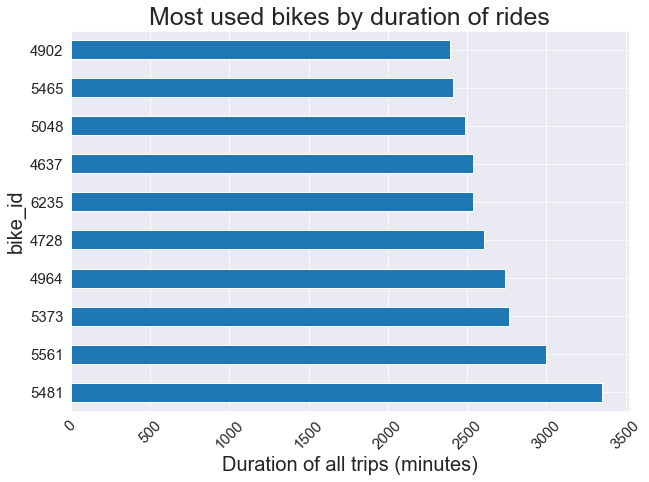

In [141]:
sb.set_style('darkgrid')
plt.xlabel('Duration of all trips (minutes)', fontsize = 20)
plt.ylabel('Bikes', fontsize = 20)
plt.xticks(rotation=45)
plt.title('Most used bikes by duration of rides', fontsize = 25)
bike.plot.barh( figsize=(10,7), fontsize = 15);



The bar plot shows the most used bikes according to the total duration of trips(in minutes), which i think is a better measure than number of trips.

### Relationships observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Bivariate section focused mainly on using the duration and time of trips to find patterns in Bike rides.

1. The scatter plot of Age vs. Duration in minutes had a negative correlation, with a concentration of riders in their 20s to 40s.
2. The heat map correlated with the scatter plot and then went further to show that the average age of riders is 23-37years old.
3. The violin plot also shows the average age of both male and female riders to be 30 years.
4. The box plot shows that for both user types- Customer and Subscriber- the median age of the most active riders is roughly 31. 
5. The distribution of male and female subscribers and customers shows about 70% more male subscribers than female subscribers.
6. The clustered bar plot shows that the peak period of trips for both men and women are evenings and mornings.
7. Line plots show the top 5 stations according to the duration of trips. Some of the stations are amongst the top 10 stations based on the number of rides, which makes sense because the more the number of rides, the more the total duration.
8. Focusing on 4 busy stations, I visualized the distribution of the duration of trips by weekdays
9. The heat maps show the frequency of trips made by men and women each weekday. It indicates that the weekends have the least trips and Thursday has the highest.
10. The bar plot shows the most used bikes based on the total duration of trips they have gone on.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The busiest stations, according to the number of trips and duration of trips, have some intersections. However, the most used bikes, according to the number of trips and duration of trips, do not have any intersections.


<a id='multivariate'></a>
## Multivariate Exploration

> Plots of three or more variables to investigate the data even further. 

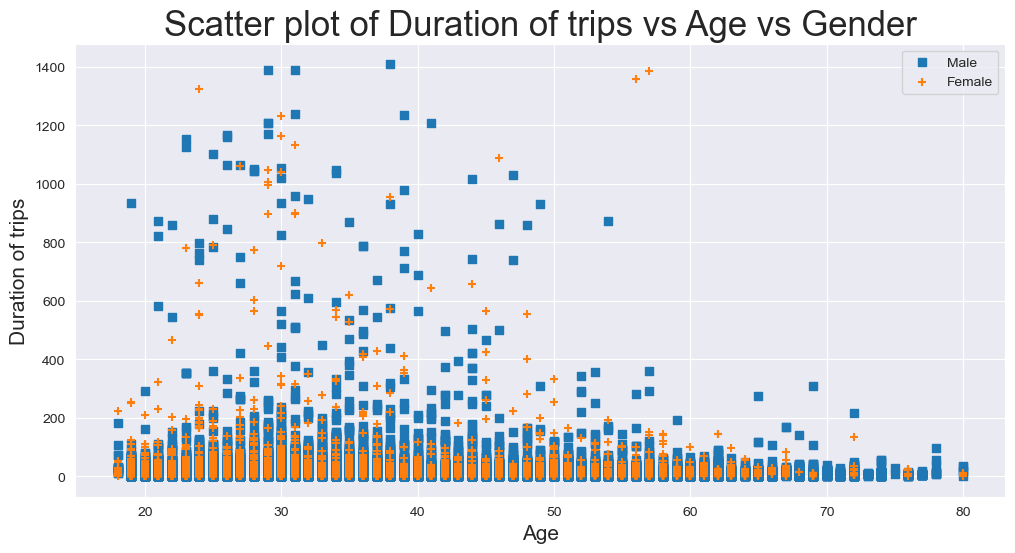

In [214]:
#Scatter plot using non-positonal encoding via shape

markers = [['Male', 's'],
               ['Female', '+']]
plt.figure(figsize=(12,6), dpi = 100)
plt.title('Scatter plot of Duration of trips vs Age vs Gender', fontsize=25)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Duration of trips', fontsize=15);
  
for gender, marker in markers:
    ford_data2 = ford_data[ford_data['member_gender'] == gender]
    plt.scatter(data = ford_data2, x = 'Age', y = 'duration_minutes', marker = marker)
    plt.legend(['Male','Female']);
       

The scatter plot above shows that there are more sparse women riders. There are outlying points of women in their 50s riding for a long time, 1400minutes (about 24hrs). This probably means the women just took longer to return the bikes. It also further confirms that for both genders, the most active age of riders based on duration falls between the late 20s to early 40s. It also shows that most rides are less than 200minutes.

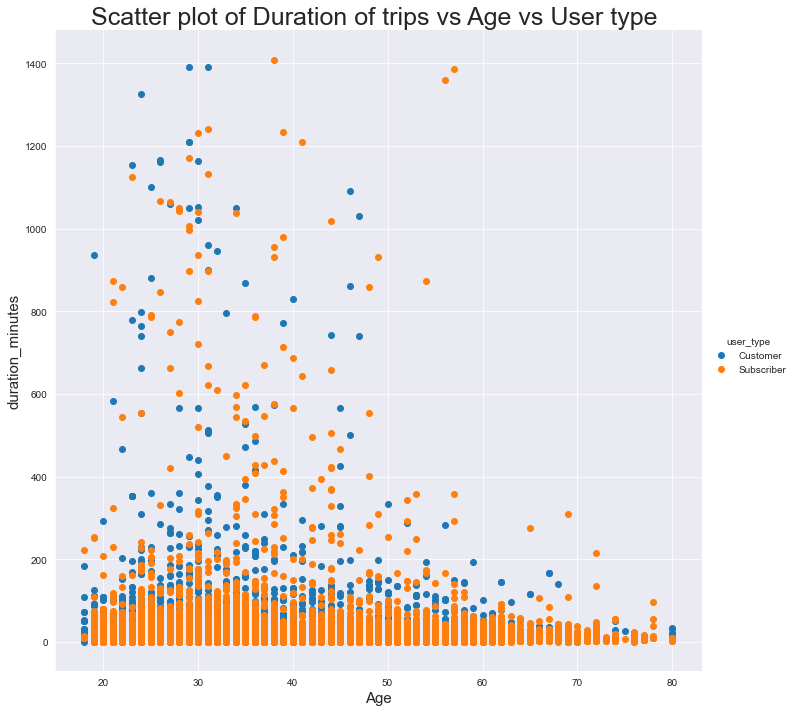

In [215]:
#Scatter plot using non-positonal encoding
g = sb.FacetGrid(data = ford_data, hue = 'user_type', height = 10)
plt.title('Scatter plot of Duration of trips vs Age vs User type ', fontsize=25)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Duration', fontsize=15)
g.map(plt.scatter, 'Age', 'duration_minutes');
g.add_legend();

The scatter plot above shows that there are more sparse customers compared to subscribers. The outlying points coincide with those of women in their 50s who ride for a long time, which is a clear indication that the women are subscribers. It also further confirms that for both user types, the most active age of riders based on duration falls between the late 20s to early 40s. Both user types get to ride (or get a bike) for long hours, although more subscribers are riding for longer. It also shows that most rides are less than 200minutes.

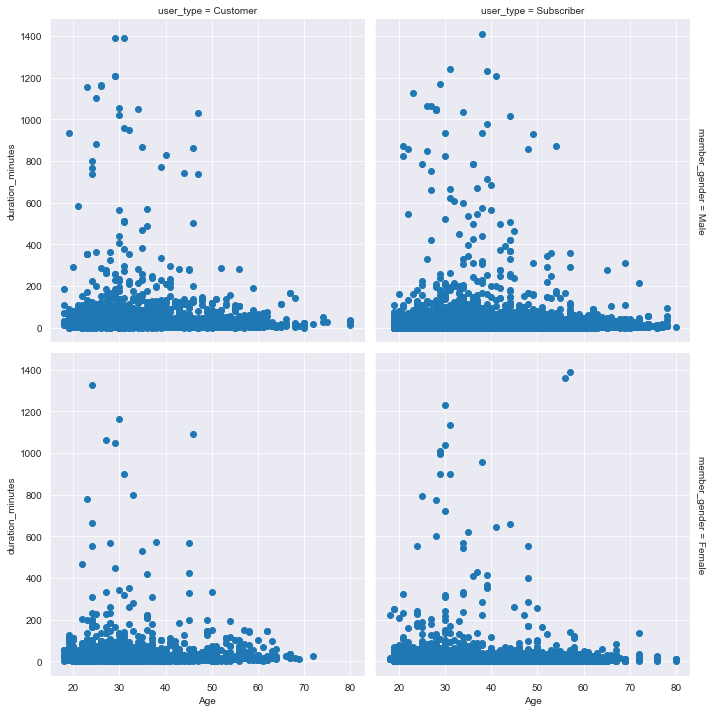

In [218]:
#Facet grid to further breakdown riders by user type and gender
g = sb.FacetGrid(data = ford_data, col = 'user_type', row = 'member_gender', height = 5,
                margin_titles = True)
g.map(plt.scatter, 'Age', 'duration_minutes');

The facet grid plot helps to combine the information from the two previous plots. These grids are scatterplots combining user types, gender, ages, and trip durations. It still further confirms a concentration of riders in their late 20s to 40s and that most rides are less than 200minutes.

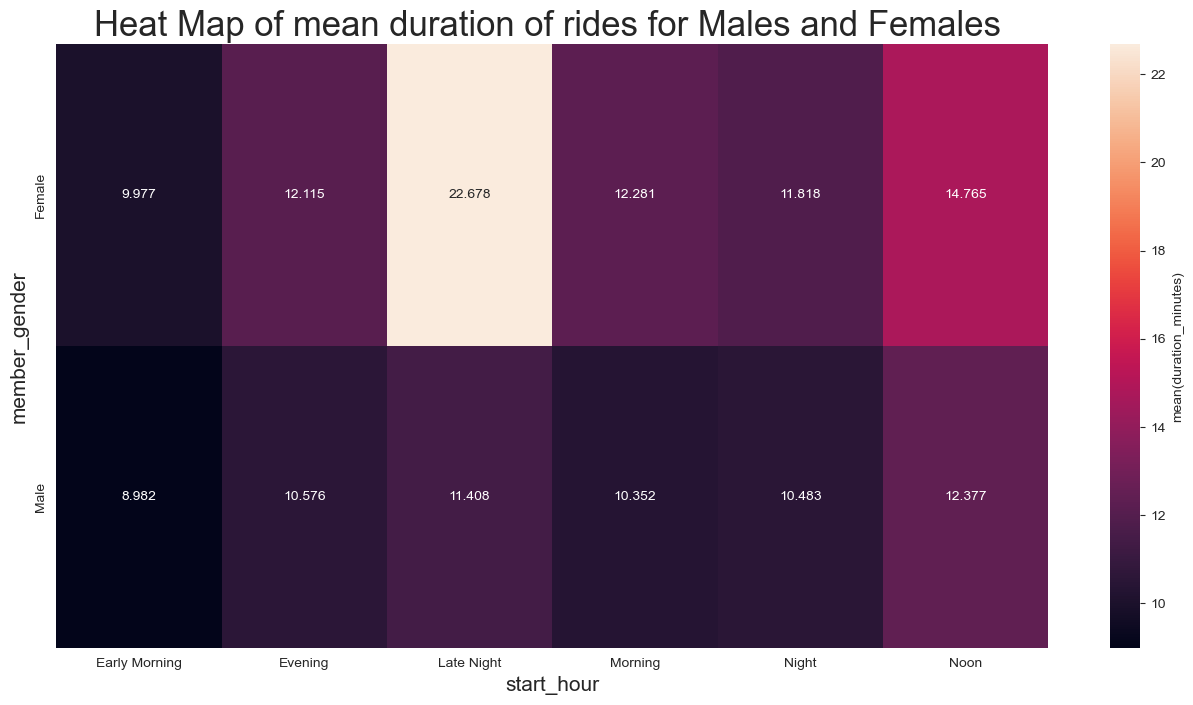

In [189]:
#heat map to depict mean of duration
avg_t = ford_data.groupby(['start_hour', 'member_gender']).mean()['duration_minutes']
avg_t = avg_t.reset_index(name = 'duration_minutes_avg')
avg_t = avg_t.pivot(index = 'member_gender', columns = 'start_hour',
                            values = 'duration_minutes_avg')
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Heat Map of mean duration of rides for Males and Females ', fontsize=25)
plt.xlabel('Start hour', fontsize=15)
plt.ylabel('Gender', fontsize=15);
sb.heatmap(avg_t, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_minutes)'});

The heat map shows the mean values of the duration of trips at different times of the day by men and women. The mean values of the trips are higher for women, which means women probably have a longer duration of trips, or extreme outliers are affecting the mean distribution.

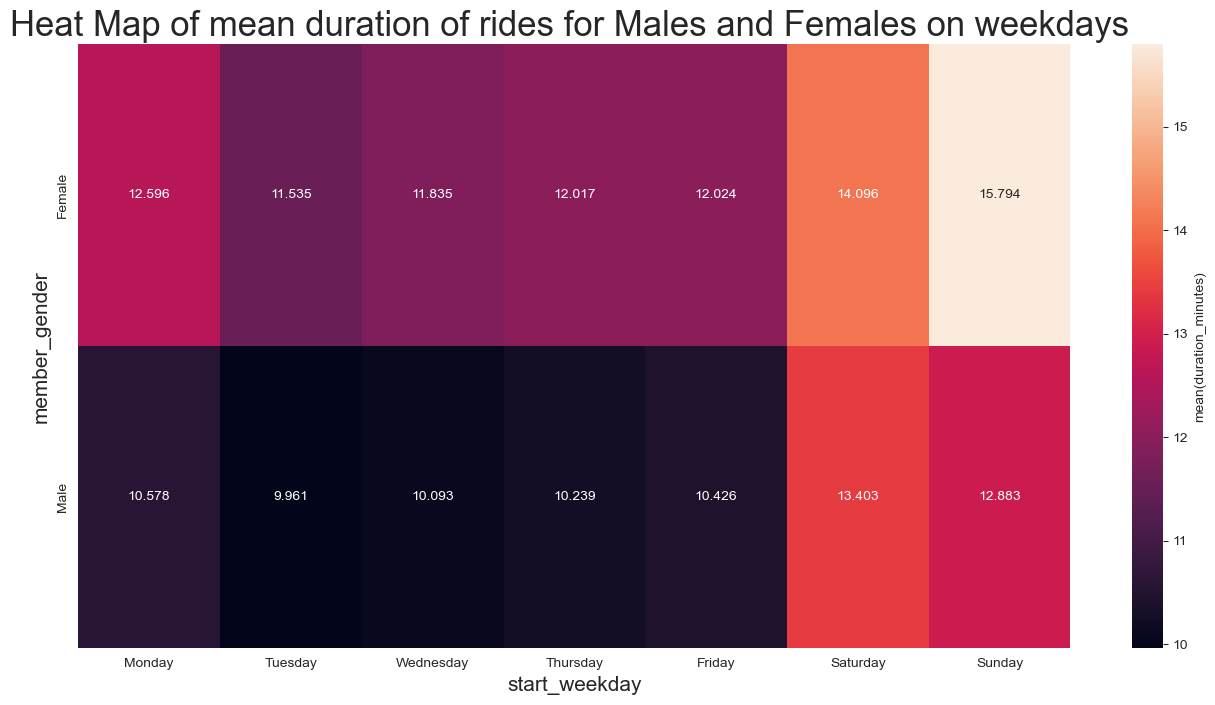

In [193]:
#heat map to depict mean of duration
avg_dur = ford_data.groupby(['start_weekday', 'member_gender']).mean()['duration_minutes']
avg_dur = avg_dur.reset_index(name = 'duration_minutes_avg')
avg_dur = avg_dur.pivot(index = 'member_gender', columns = 'start_weekday',
                            values = 'duration_minutes_avg')
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Heat Map of mean duration of rides for Males and Females on weekdays ', fontsize=25)
plt.xlabel('Start hour', fontsize=15)
plt.ylabel('Gender', fontsize=15);
sb.heatmap(avg_dur, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_minutes)'});

The heat map shows the mean values of the duration of weekday trips by men and women. The mean values of the trips are higher for women, which means women probably have a longer duration of trips, or extreme outliers are affecting the mean distribution.

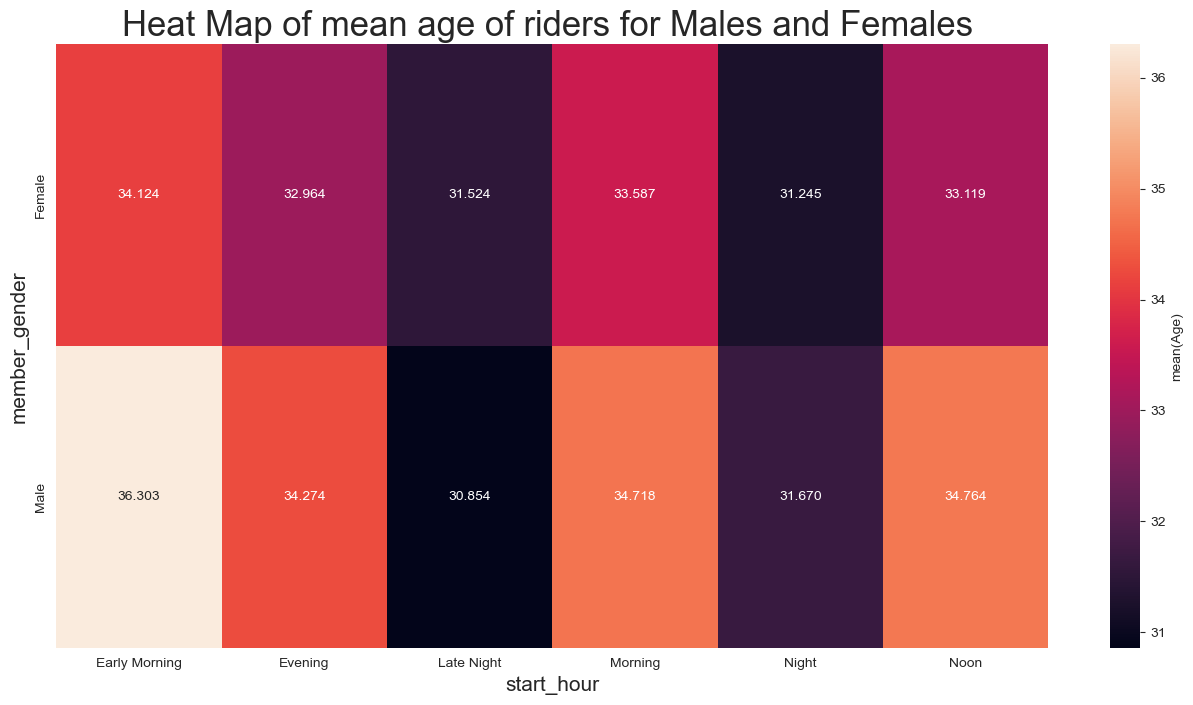

In [190]:
#heat map to depict mean of ages
avg_age = ford_data.groupby(['start_hour', 'member_gender']).mean()['Age']
avg_age = avg_age.reset_index(name = 'Age_avg')
avg_age = avg_age.pivot(index = 'member_gender', columns = 'start_hour',
                            values = 'Age_avg')
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Heat Map of mean age of riders for Males and Females ', fontsize=25)
plt.xlabel('Start hour', fontsize=15)
plt.ylabel('Gender', fontsize=15);
sb.heatmap(avg_age, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Age)'});

The heat map shows the mean ages of riders at different times of the day. It shows that, on average, older men ride in the early mornings, the same for women. It also shows that younger men are likely to ride late at night more. While younger women tend to ride more at night and late at night.

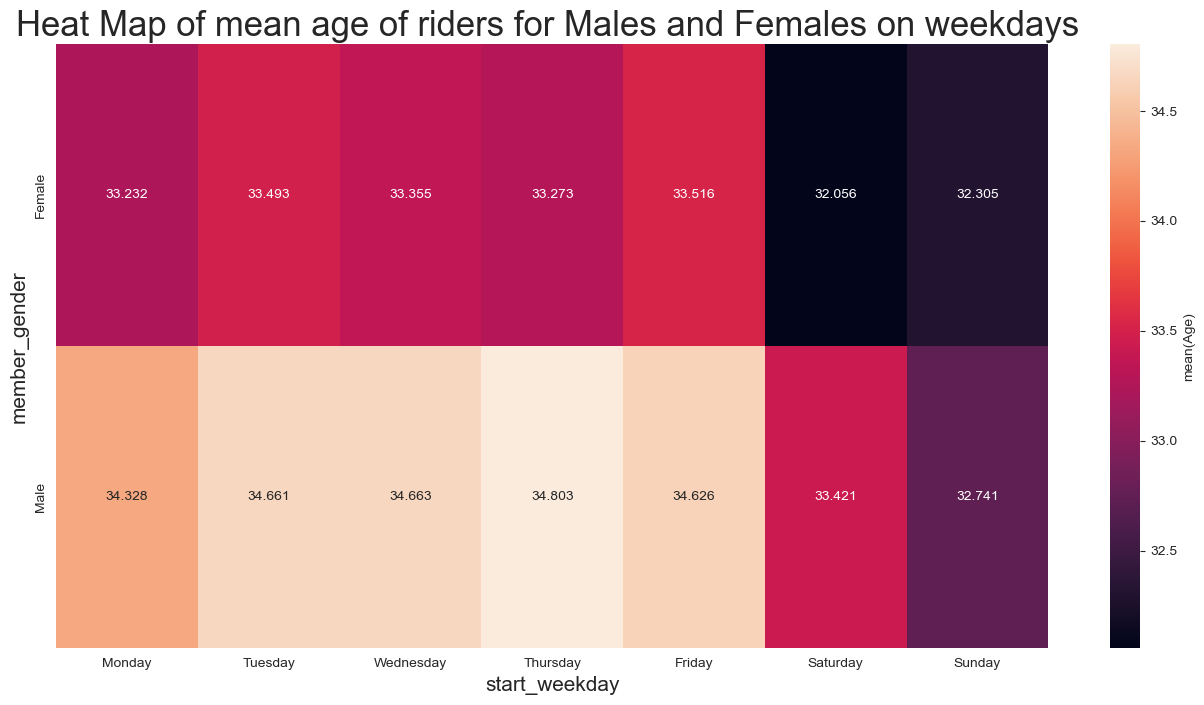

In [191]:
#heat map to depict mean of duration
avg_age2 = ford_data.groupby(['start_weekday', 'member_gender']).mean()['Age']
avg_age2 = avg_age2.reset_index(name = 'Age_avg')
avg_age2 = avg_age2.pivot(index = 'member_gender', columns = 'start_weekday',
                            values = 'Age_avg')
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Heat Map of mean age of riders for Males and Females on weekdays ', fontsize=25)
plt.xlabel('Weekdays', fontsize=15)
plt.ylabel('Gender', fontsize=15);
sb.heatmap(avg_age2, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Age)'});

The heat map shows the mean ages of riders at different times of the week. The mean ages are evenly distributed across the weekdays for men and women, with a drop on weekends. Women specifically seemed to have a drastic reduction in mean ages on Saturdays, meaning fewer female riders.

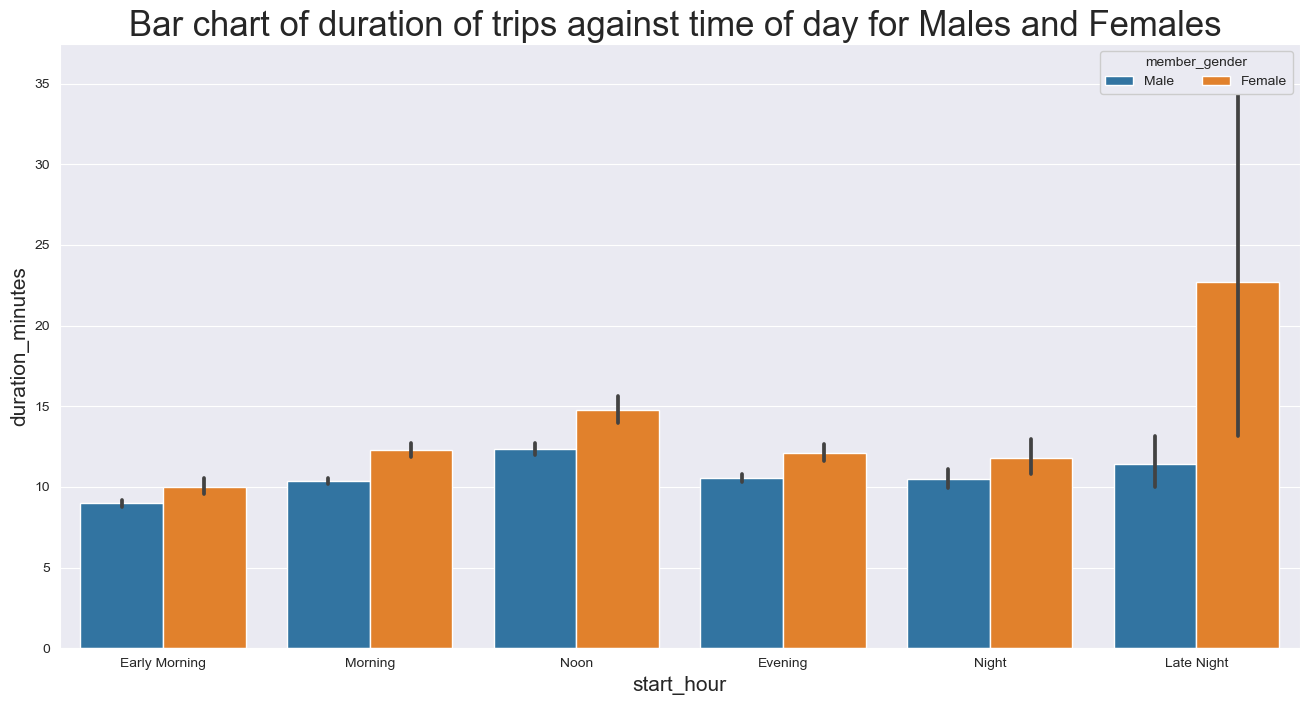

In [232]:
#clustered bar chart using barplot 
order1= ['Early Morning', 'Morning','Noon','Evening','Night','Late Night']
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Bar chart of duration of trips against time of day for males and females ', fontsize=25)
plt.xlabel('End hour', fontsize=15)
plt.ylabel('Duration', fontsize=15)
ax = sb.barplot(data = ford_data, x = 'start_hour', 
                y = 'duration_minutes', 
                hue = 'member_gender',
               order= order1)
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'member_gender');

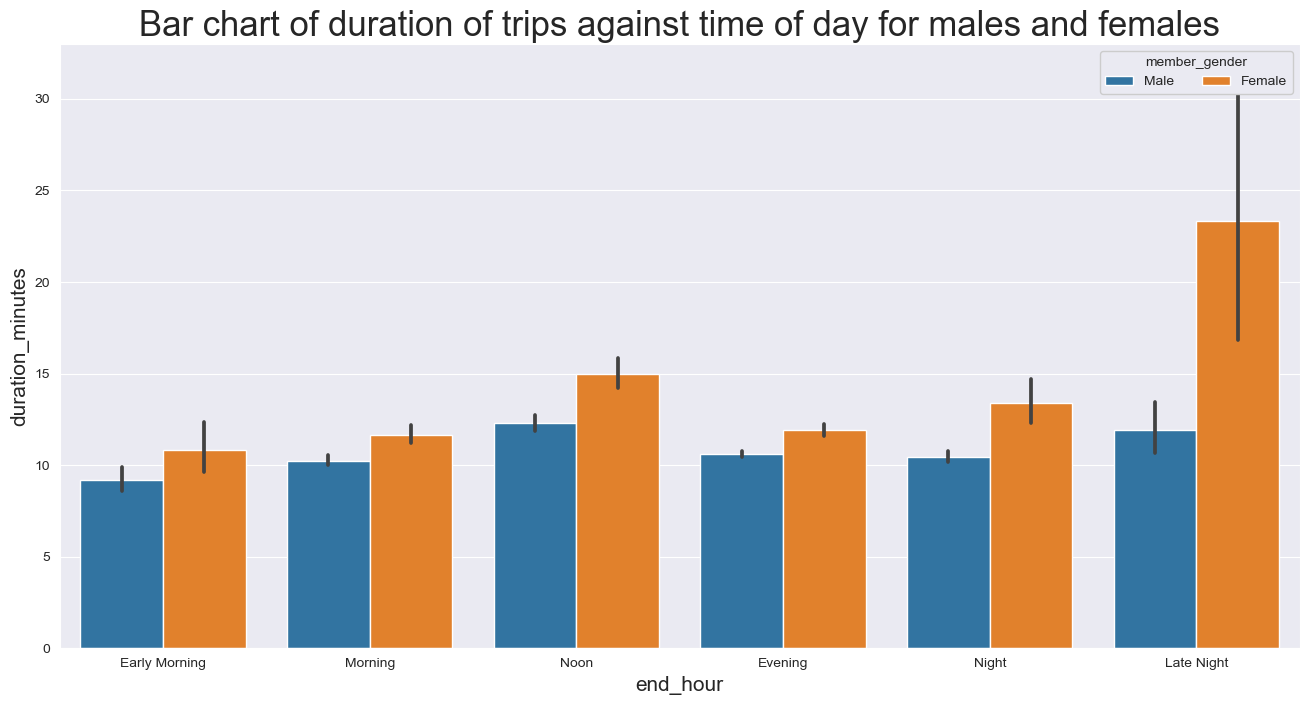

In [233]:
#clustered bar chart using barplot 
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Bar chart of duration of trips against time of day for males and females', fontsize=25)
plt.xlabel('End hour', fontsize=15)
plt.ylabel('Duration', fontsize=15)
ax = sb.barplot(data = ford_data, x = 'end_hour', 
                y = 'duration_minutes', 
                hue = 'member_gender',
               order=order1)
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'member_gender');

These bar plots show us that although men have a higher count of trips, women have a higher duration of trips at several points in a day.

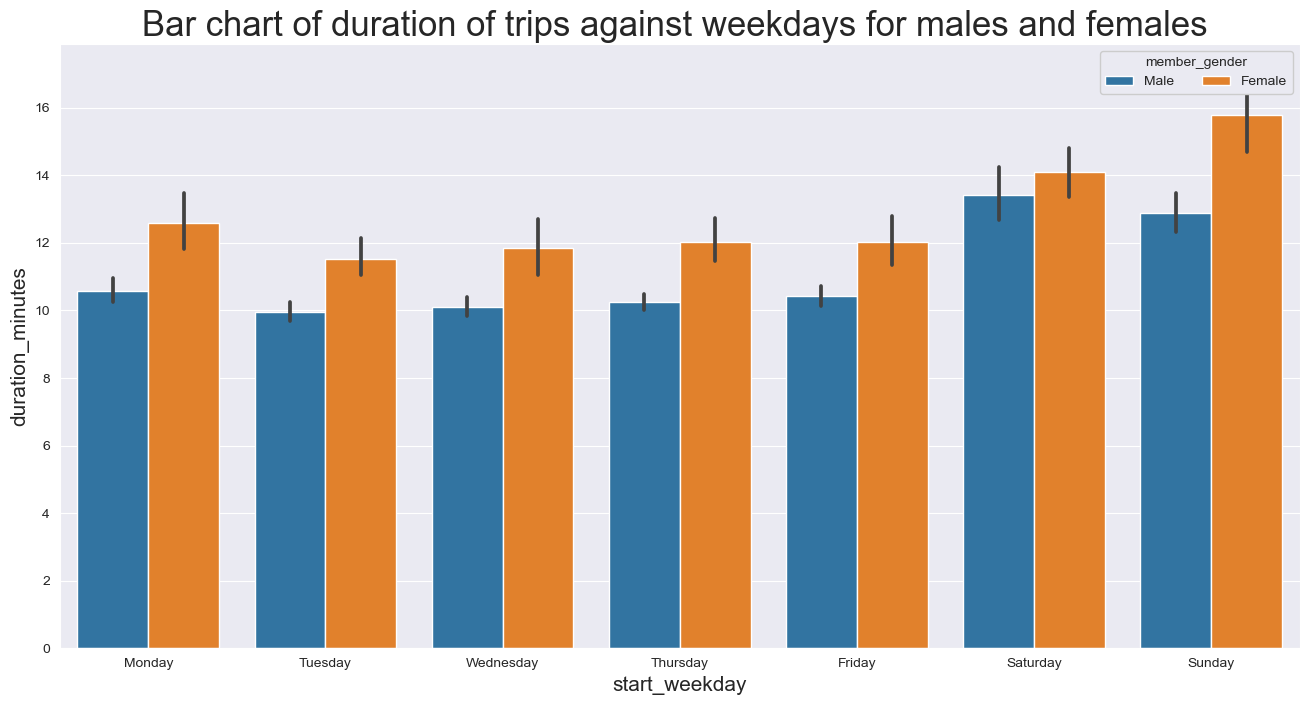

In [250]:
#clustered bar chart using barplot 
plt.figure(figsize=(16,8), dpi = 100)
plt.title('Bar chart of duration of trips against weekdays for males and females ', fontsize=25)
plt.xlabel('End hour', fontsize=15)
plt.ylabel('Duration', fontsize=15)
ax = sb.barplot(data = ford_data, x = 'start_weekday', 
                y = 'duration_minutes', 
                hue = 'member_gender')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'member_gender');

I had to check if the observations would be similar when viewed on weekdays, and yes, it further confirms that although men have a higher count of trips, women have a higher duration of trips taken at several days in the week.

In [234]:
# Let's take a look at gender groups in time and stations
df_f = top4_df.query('member_gender == "Female"')
df_m = top4_df.query('member_gender == "Male"')


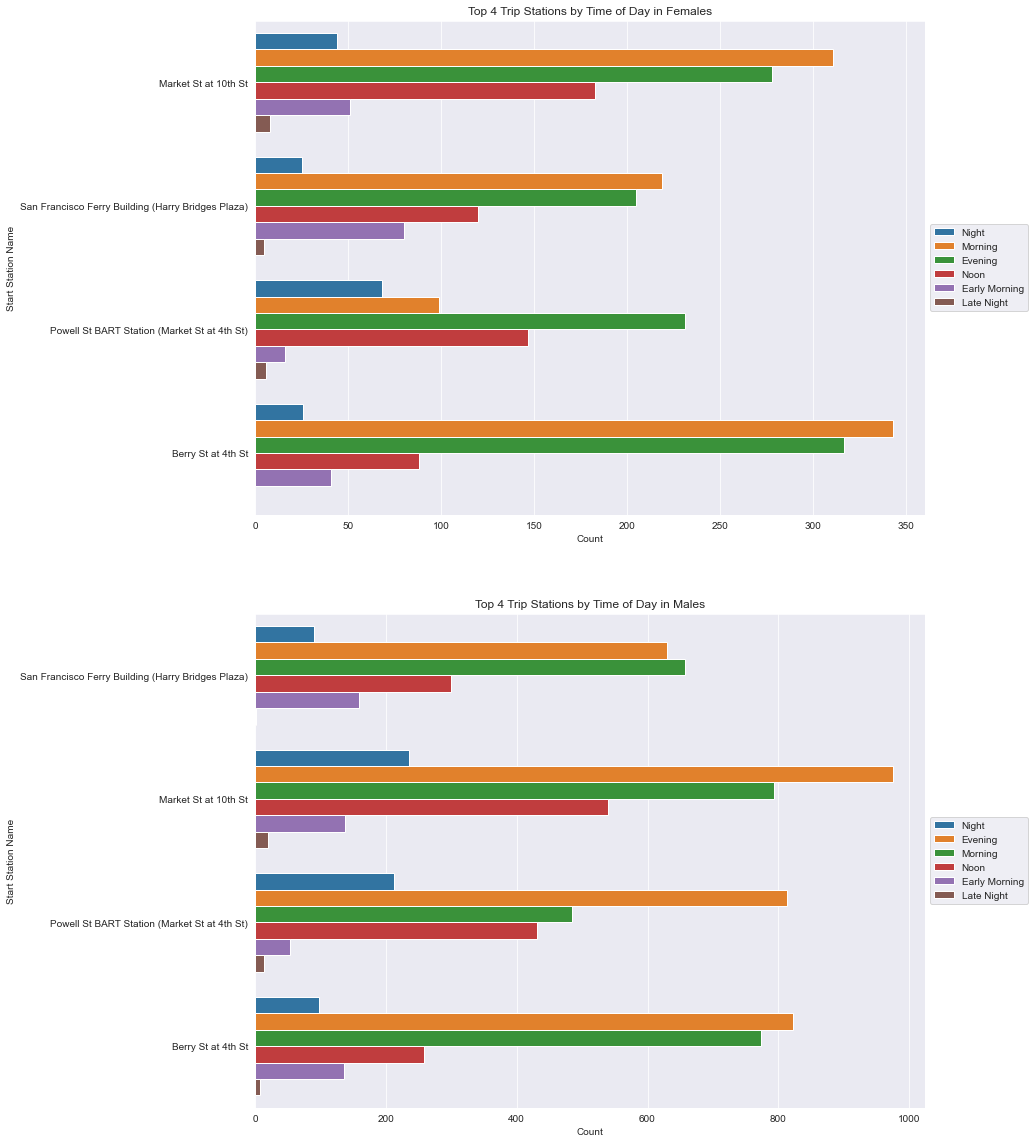

In [249]:
# Top 4 trip stations by times in each gender
# categorical variables using countplot: Time of day
plt.figure(figsize=(12,20))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='start_hour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 4 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='start_hour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 4 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');


The clustered horizontal bar chart shows the trip counts of each station at different times of the day for females and males. For women, the Berry ST at 4th St has the highest number of women in the mornings. For men, Market St at 10th St has the highest number of men in the evenings.

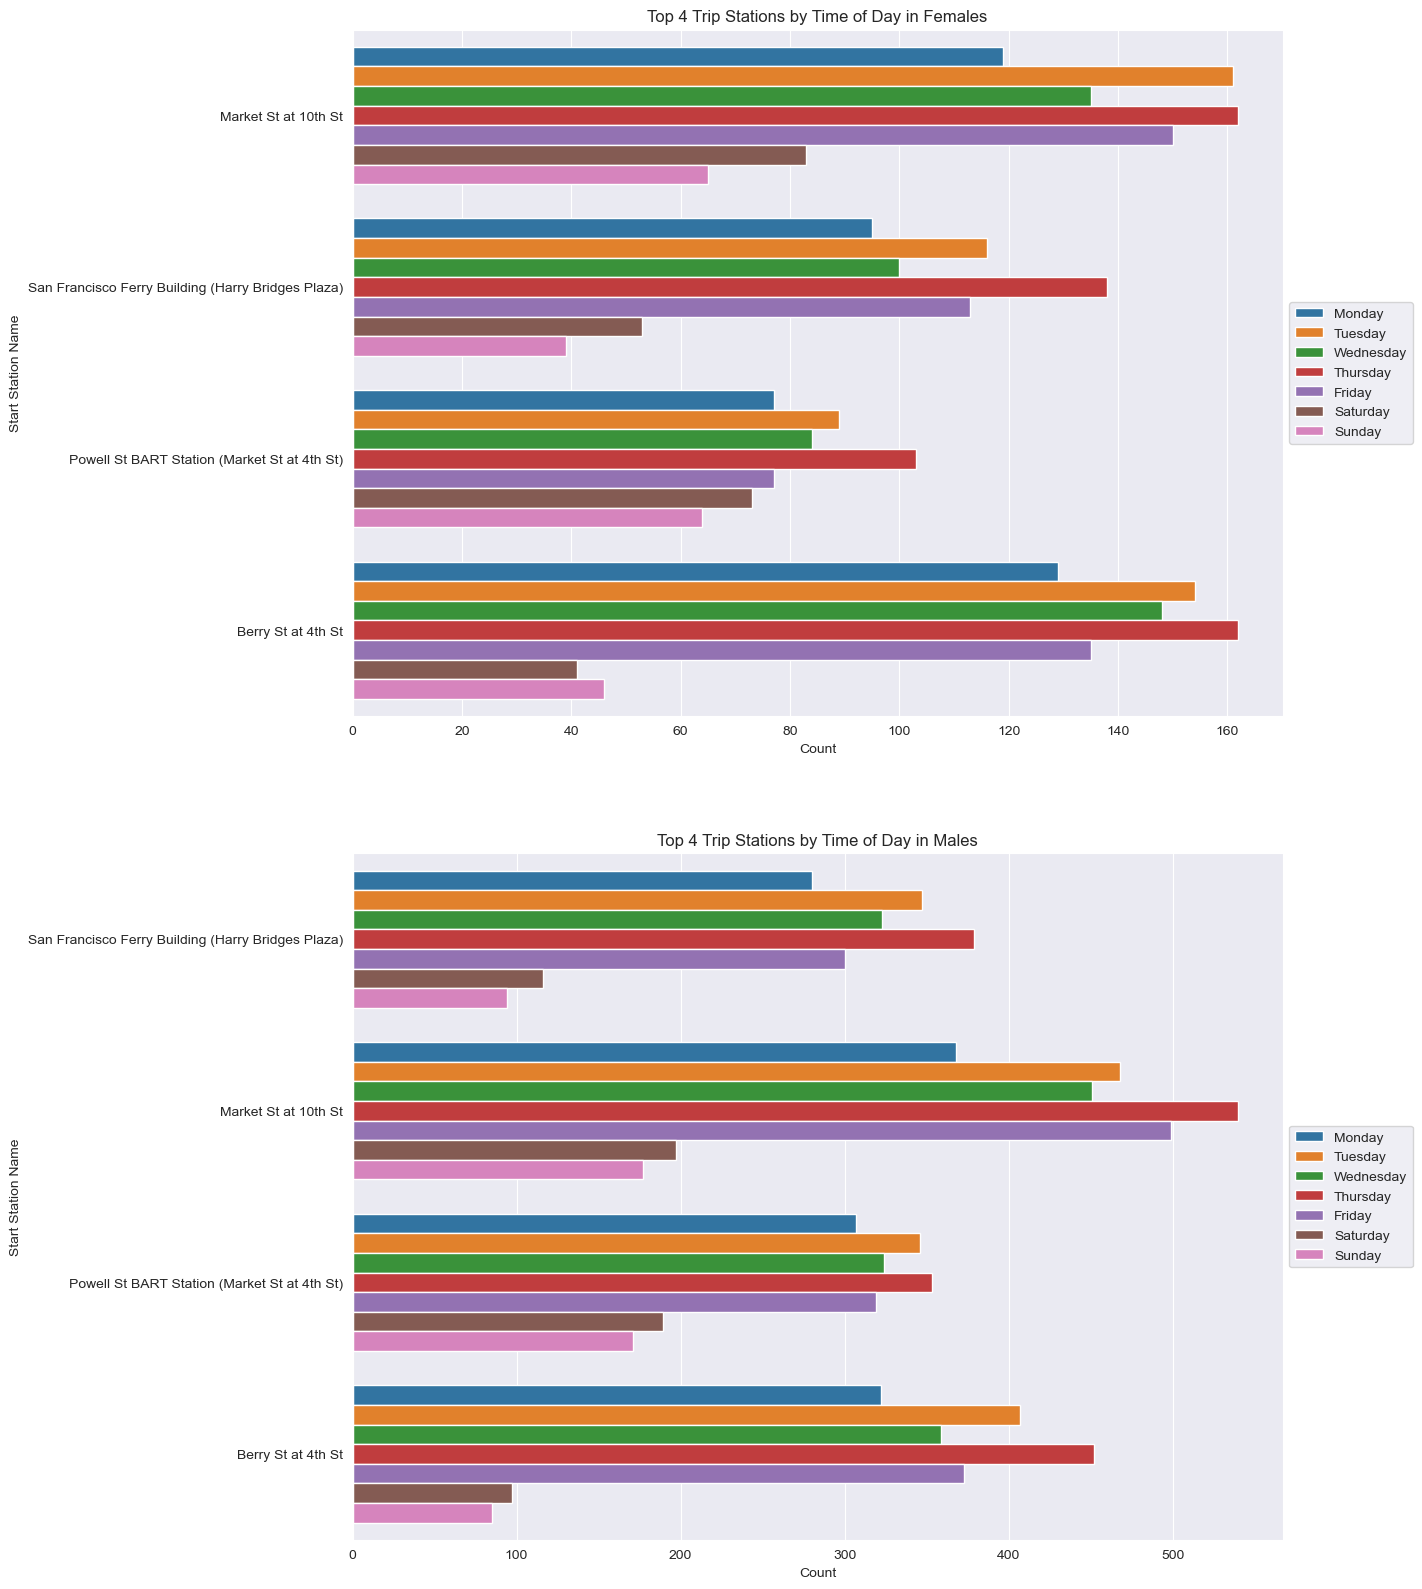

In [246]:
# Top 4 trip stations by times in each gender
# categorical variables using countplot: weekday
plt.figure(figsize=(12,20), dpi=100)
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='start_weekday')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 4 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='start_weekday')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 4 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

The clustered horizontal bar chart shows the trip counts of each station on different days for females and males.

### Some of the relationships I observed in this part of the investigation. 

> 
1. The first scatter plot above showed outlying points of women in their 50s riding for a long time, 1400minutes (about 24hrs). This probably means the women just took longer to return the bikes. It also further confirms that for both genders, the most active age of riders based on duration falls between the late 20s to early 40s. It also shows that most rides are less than 200minutes. 

2. The next scatter plot above showed that the women in their 50s who ride for a long time are subscribers. It also further confirms that for both user types, the most active age of riders based on duration falls between the late 20s to early 40s. Both user types get to ride (or get a bike) for long hours, although more subscribers are riding for longer. 

3. The heat map showed that the mean ages are evenly distributed across the weekdays for men and women, with a drop on weekends. Women specifically seemed to have a drastic reduction in mean ages on Saturdays, meaning fewer female riders.

4. The clustered bar plots show us that although men have a higher count of trips, women have a higher duration of trips at several points in a day. I had to check if the observations would be similar when viewed on weekdays, and yes, it further confirms that although men have a higher count of trips, women have a higher duration of trips taken at several days in the week.

5. The clustered horizontal bar chart shows the trip counts of each station at different times of the day for females and males. For women, the Berry ST at 4th St has the highest number of women in the mornings. For men, Market St at 10th St has the highest number of men in the evenings.

6. The clustered horizontal bar chart shows the trip counts of each station on different days for females and males.



### Were there any interesting or surprising interactions between features?

> I was surprised that the mean values of the trip duration, as shown by the heat map, show that women probably have a longer duration of trips or extreme outliers that affect the mean distribution. Previous visualizations had shown that the count of trips by men was way more than by women, so seeing this disparity in the mean values was quite interesting.

<a id='conclusions'></a>
## Conclusions
>Summary of the main findings and reflection on the steps taken during the data exploration.

During this data exploration, I focused on looking for patterns that would help make informed decisions on how advertisements could be targeted at riders. The best times to display advertisements to target specific people and the kind of reach advertisements would have on ford go bike users based on the patterns in the data.
Here are some findings that I made in the course of this exploration:
1. Male riders are 70% of the total riders.
2. Suscribers make 90.59% of the total riders.
3. The weekends have the least activity of riders.
4. Thursday is the busiest day of the week.
5. Most riders are in their 20s & 30s.
6. Most rides have a duration of less than 200minutes.
7. Women almost never go riding late at night.
8. Market St at 10th St is the busiest station.

> Throughout the exploration I focused on confriming patterns concerning age group and gender distribution in the data